Identify **incredible customers** based on their **financial transactions** and **debt classification group**. 

As part of the requirements, students have to decide ***“Which group of debts are incredible”*** by themselves, as long as it helps to distinguish between
credible and incredible customers.

# 0. Preparing

LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy import sqrt
from numpy import argmax
import statistics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install --user scikit-learn imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.utils import class_weight
from sklearn.utils import resample

from sklearn.feature_selection import RFE

In [5]:
import imblearn
from imblearn.over_sampling import SMOTE

In [6]:
import time
import datetime
from datetime import date

DATABASE IMPORT

In [7]:
df = pd.read_csv("dataset.csv")
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data Preprocessing

In [9]:
#Check số hàng của database
df.shape[0]

100000

In [10]:
#Kiếm tra các cột
df.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_incorp_date', ' amount_week ', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', ' total_amt_mar2021 ', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
       'totalLoginMar2021_heoSo', 

In [11]:
#Xét thấy có nhiều dấu cách thừa trong các cột của dataframe, nhóm quyết định remove các dấu cách thừa bằng lệnh strip:
df.columns = df.columns.str.strip()
df.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_incorp_date', 'amount_week', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
       'totalLoginMar2021_heoSo', 'tot

a. Xử lý xếp hạng tín dụng

In [12]:
#Thống kê tần suất & số lần xuất hiện của các nhóm xhtd
df['nhomno_xhtdJuin2021'].value_counts(normalize=True)

1.0    0.528475
2.0    0.282581
3.0    0.089398
4.0    0.079450
5.0    0.020096
Name: nhomno_xhtdJuin2021, dtype: float64

In [13]:
df['nhomno_xhtdJuin2021'].value_counts()

1.0    15831
2.0     8465
3.0     2678
4.0     2380
5.0      602
Name: nhomno_xhtdJuin2021, dtype: int64

In [14]:
df['nhomno_xhtdJuin2021'].unique()
# Có giá trị nan ở trong đây

array([nan,  1.,  2.,  3.,  4.,  5.])

In [15]:
#Tính số dòng không có nan
df["nhomno_xhtdJuin2021"].value_counts().sum()

29956

In [16]:
#Tính số nan:
df.shape[0] - df["nhomno_xhtdJuin2021"].value_counts().sum()

70044

In [17]:
#Loại bỏ các giá trị NaN
df = df[df['nhomno_xhtdJuin2021'].notna()]
df
#Kết quả trả về sẽ có 29956 dòng, tương ứng với số dòng không NaN bên trên

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
7,MALE,Married,38.0,394.0,15436.0,1992.0,0.0,0.000476,0.000011,0.0,...,NaN,0.000139,0.000456,0.000000,1.0,1005.0,379.0,NH,1740.0,23311.0
11,MALE,Married,64.0,632.0,23899.0,1987.0,NaN,NaN,NaN,NaN,...,NaN,0.012917,0.024721,0.014677,1.0,21063.0,330.0,DH,1889.0,22111.0
12,MALE,Single,56.0,568.0,22357.0,1996.0,0.0,0.000014,0.000079,0.0,...,NaN,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1740.0,26111.0
14,MALE,Married,1.0,5.0,166.0,1973.0,NaN,NaN,NaN,NaN,...,NaN,0.026599,0.049072,0.029538,1.0,21061.0,362.0,DH,1888.0,21311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99850,MALE,Single,48.0,493.0,20263.0,1988.0,NaN,NaN,NaN,NaN,...,0.010638,0.001271,0.003703,0.002198,1.0,21064.0,462.0,TH,1700.0,23231.0
99853,FEMALE,Married,1.0,3.0,94.0,1992.0,NaN,NaN,NaN,0.0,...,0.010638,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1891.0,26112.0
99864,MALE,Single,84.0,845.0,29335.0,1991.0,NaN,NaN,NaN,NaN,...,0.042553,0.020625,0.028805,0.017101,1.0,21061.0,365.0,DH,1891.0,22321.0
99915,FEMALE,Married,89.0,883.0,30310.0,1985.0,NaN,NaN,NaN,NaN,...,0.010638,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1700.0,26111.0


b. Xử lý độ tuổi

In [18]:
df['birth_incorp_date'].unique()

array([1986., 1992., 1987., 1996., 1973., 1975., 1991., 1995., 1969.,
       1978., 1981., 1982., 1985., 1983., 1977., 1989., 1997., 1990.,
       1994., 1984., 1993., 1988., 1971., 1976., 1979., 1967., 1966.,
       1962., 1980., 1968., 2002., 1958., 1974., 1972., 1970., 1964.,
       1960., 1965., 1998., 1963., 1956., 1959., 1957., 1999., 1955.,
       1961., 2000., 1779., 2009., 2010.,   nan, 1954., 2003., 2001.,
       1951., 2011.])

In [19]:
date.today().year

2022

In [20]:
(date.today().year - df['birth_incorp_date']) + 1

1        37.0
7        31.0
11       36.0
12       27.0
14       50.0
         ... 
99850    35.0
99853    31.0
99864    32.0
99915    38.0
99993    34.0
Name: birth_incorp_date, Length: 29956, dtype: float64

In [21]:
df['birth_incorp_age'] = (date.today().year - df['birth_incorp_date']) + 1
df['birth_incorp_age'].unique()

array([ 37.,  31.,  36.,  27.,  50.,  48.,  32.,  28.,  54.,  45.,  42.,
        41.,  38.,  40.,  46.,  34.,  26.,  33.,  29.,  39.,  30.,  35.,
        52.,  47.,  44.,  56.,  57.,  61.,  43.,  55.,  21.,  65.,  49.,
        51.,  53.,  59.,  63.,  58.,  25.,  60.,  67.,  64.,  66.,  24.,
        68.,  62.,  23., 244.,  14.,  13.,  nan,  69.,  20.,  22.,  72.,
        12.])

In [22]:
df['birth_incorp_age'].value_counts()

31.0     1682
33.0     1649
32.0     1606
34.0     1559
30.0     1548
35.0     1525
38.0     1511
39.0     1486
36.0     1455
29.0     1427
40.0     1406
41.0     1391
37.0     1276
42.0     1046
28.0     1011
43.0      912
44.0      848
27.0      801
46.0      667
45.0      658
26.0      644
47.0      602
48.0      517
49.0      461
50.0      365
52.0      279
51.0      272
53.0      238
25.0      208
54.0      148
55.0      137
56.0       96
24.0       90
58.0       71
57.0       68
59.0       48
23.0       44
60.0       39
61.0       31
63.0       29
64.0       18
62.0       16
67.0       15
65.0       15
66.0       12
68.0        6
21.0        6
22.0        5
69.0        4
72.0        2
244.0       1
14.0        1
13.0        1
20.0        1
12.0        1
Name: birth_incorp_age, dtype: int64

In [23]:
df['birth_incorp_age'].value_counts().sort_index()

12.0        1
13.0        1
14.0        1
20.0        1
21.0        6
22.0        5
23.0       44
24.0       90
25.0      208
26.0      644
27.0      801
28.0     1011
29.0     1427
30.0     1548
31.0     1682
32.0     1606
33.0     1649
34.0     1559
35.0     1525
36.0     1455
37.0     1276
38.0     1511
39.0     1486
40.0     1406
41.0     1391
42.0     1046
43.0      912
44.0      848
45.0      658
46.0      667
47.0      602
48.0      517
49.0      461
50.0      365
51.0      272
52.0      279
53.0      238
54.0      148
55.0      137
56.0       96
57.0       68
58.0       71
59.0       48
60.0       39
61.0       31
62.0       16
63.0       29
64.0       18
65.0       15
66.0       12
67.0       15
68.0        6
69.0        4
72.0        2
244.0       1
Name: birth_incorp_age, dtype: int64

In [24]:
#Loại bỏ những người có độ tuổi <18 hoặc >100, làm sai lệch trong bộ dữ liệu
df.drop(df[(df.birth_incorp_age < 18) | (df.birth_incorp_age >100)].index, inplace = True)

In [25]:
df['birth_incorp_age']

1        37.0
7        31.0
11       36.0
12       27.0
14       50.0
         ... 
99850    35.0
99853    31.0
99864    32.0
99915    38.0
99993    34.0
Name: birth_incorp_age, Length: 29952, dtype: float64

In [26]:
df['birth_incorp_age'].value_counts().sort_index()
# Hiện tại độ tuổi đã được fill chính xác hơn và được loại bỏ các thông tin gây sai lệch

20.0       1
21.0       6
22.0       5
23.0      44
24.0      90
25.0     208
26.0     644
27.0     801
28.0    1011
29.0    1427
30.0    1548
31.0    1682
32.0    1606
33.0    1649
34.0    1559
35.0    1525
36.0    1455
37.0    1276
38.0    1511
39.0    1486
40.0    1406
41.0    1391
42.0    1046
43.0     912
44.0     848
45.0     658
46.0     667
47.0     602
48.0     517
49.0     461
50.0     365
51.0     272
52.0     279
53.0     238
54.0     148
55.0     137
56.0      96
57.0      68
58.0      71
59.0      48
60.0      39
61.0      31
62.0      16
63.0      29
64.0      18
65.0      15
66.0      12
67.0      15
68.0       6
69.0       4
72.0       2
Name: birth_incorp_age, dtype: int64

In [27]:
# Sau khi xử lý database thì database giảm đi 4 dòng so với ban đầu, chỉ còn 29952 dòng, tương ứng với 4 người tuổi không hợp lý
df

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,birth_incorp_age
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,37.0
7,MALE,Married,38.0,394.0,15436.0,1992.0,0.0,0.000476,0.000011,0.0,...,0.000139,0.000456,0.000000,1.0,1005.0,379.0,NH,1740.0,23311.0,31.0
11,MALE,Married,64.0,632.0,23899.0,1987.0,NaN,NaN,NaN,NaN,...,0.012917,0.024721,0.014677,1.0,21063.0,330.0,DH,1889.0,22111.0,36.0
12,MALE,Single,56.0,568.0,22357.0,1996.0,0.0,0.000014,0.000079,0.0,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1740.0,26111.0,27.0
14,MALE,Married,1.0,5.0,166.0,1973.0,NaN,NaN,NaN,NaN,...,0.026599,0.049072,0.029538,1.0,21061.0,362.0,DH,1888.0,21311.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99850,MALE,Single,48.0,493.0,20263.0,1988.0,NaN,NaN,NaN,NaN,...,0.001271,0.003703,0.002198,1.0,21064.0,462.0,TH,1700.0,23231.0,35.0
99853,FEMALE,Married,1.0,3.0,94.0,1992.0,NaN,NaN,NaN,0.0,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1891.0,26112.0,31.0
99864,MALE,Single,84.0,845.0,29335.0,1991.0,NaN,NaN,NaN,NaN,...,0.020625,0.028805,0.017101,1.0,21061.0,365.0,DH,1891.0,22321.0,32.0
99915,FEMALE,Married,89.0,883.0,30310.0,1985.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1700.0,26111.0,38.0


c. Xử lý most_act_mar2021

In [28]:
#Xét thấy tất cả các data đang có chữ giao dịch ở phía trước, cũng như viết hoa viết thường không xác định, nhóm quyết định xử lý như sau:
df["most_act_mar2021"] = df["most_act_mar2021"].str.lower()
df["most_act_mar2021"] = df["most_act_mar2021"].str.replace("giao dich ", "")
df["most_act_mar2021"].value_counts()

chuyen khoan     19965
thanh toan        3475
phi tai chinh      576
rut tien atm       127
tiet kiem           32
Name: most_act_mar2021, dtype: int64

In [29]:
df["most_act_mar2021"].unique()
#các trường thông tin giờ đã đơn giản hơn và gọn gàng hơn

array([nan, 'chuyen khoan', 'phi tai chinh', 'thanh toan', 'rut tien atm',
       'tiet kiem'], dtype=object)

# d. Xử lý các trường thông tin còn thiếu bằng cách fill thông tin

d1. Xử lý local_ref_1

In [30]:
df["local_ref_1"].value_counts().sum()

28966

In [31]:
df.shape[0] - df["local_ref_1"].value_counts().sum()
#Có 986 giá trị nan trong cột local ref

986

In [32]:
df["local_ref_1"].value_counts(normalize = True)

MALE      0.7118
FEMALE    0.2882
Name: local_ref_1, dtype: float64

In [33]:
# Xét thấy có 71.18% số người trong database là Nam, nhóm quyết định fill giá trị NaN bằng Male
df['local_ref_1'].fillna(statistics.mode(df['local_ref_1']), inplace=True)

In [34]:
df["local_ref_1"].value_counts(normalize = True)
#Sau khi kiểm tra lại, tỉ lệ male tăng lên 72.13%, NaN = 0%

MALE      0.721287
FEMALE    0.278713
Name: local_ref_1, dtype: float64

d2. Xử lý trạng thái hôn nhân

In [35]:
df['vn_marital_status'].unique()

array(['Single', 'Married', nan, 'Partner', 'Other', 'Seperated',
       'Divorced', 'Widow'], dtype=object)

In [36]:
df['vn_marital_status'].value_counts(normalize = True)
#Xét thấy tỉ lệ người đã kết hôn là 61.98%, tỉ lệ cao nhất, nhóm quyết định fill các giá trị NaN bằng Married.

Married      0.619758
Single       0.374251
Other        0.004328
Divorced     0.000831
Partner      0.000589
Widow        0.000208
Seperated    0.000035
Name: vn_marital_status, dtype: float64

In [37]:
df['vn_marital_status'].fillna(statistics.mode(df['vn_marital_status']), inplace=True)
df['vn_marital_status'].value_counts(normalize = True)
#Sau khi xử lý xong thì tỉ lệ người đã kết hôn tăng lên 63.34%

Married      0.633380
Single       0.360844
Other        0.004173
Divorced     0.000801
Partner      0.000568
Widow        0.000200
Seperated    0.000033
Name: vn_marital_status, dtype: float64

d3. Xử lý vị trí địa lý

In [38]:
df['resid_province'].value_counts(normalize= True)

1.0     0.240922
79.0    0.108684
31.0    0.040566
38.0    0.030897
75.0    0.026280
          ...   
6.0     0.000727
2.0     0.000654
4.0     0.000654
62.0    0.000218
12.0    0.000109
Name: resid_province, Length: 63, dtype: float64

In [39]:
print(df.shape[0] - df['resid_province'].value_counts().sum())
print(df.shape[0])
#Có 2441 giá trị NaN trên tổng 29952 dòng

2441
29952


In [40]:
#Xét thấy có 24.09% số người ở tỉnh thành số 1.0, nhóm quyết định fill thông tin NaN bằng tỉnh thành số 1.0
df['resid_province'].fillna(statistics.mode(df['resid_province']), inplace= True)
df['resid_province'].value_counts(normalize = True)
#Sau khi xử lý xong thì số người ở tỉnh thành số 1 tăng lên 30%, nên chú ý vì thay đổi tỉ lệ khá nhiều

1.0     0.302784
79.0    0.099826
31.0    0.037260
38.0    0.028379
75.0    0.024139
          ...   
6.0     0.000668
2.0     0.000601
4.0     0.000601
62.0    0.000200
12.0    0.000100
Name: resid_province, Length: 63, dtype: float64

In [41]:
df['resid_district'].value_counts(normalize= True)

6.0      0.021700
268.0    0.016830
8.0      0.016612
9.0      0.016539
1.0      0.016393
           ...   
388.0    0.000036
652.0    0.000036
638.0    0.000036
63.0     0.000036
220.0    0.000036
Name: resid_district, Length: 650, dtype: float64

In [42]:
df.shape[0] - df['resid_district'].value_counts().sum()
#Có 2441 trường hợp NaN

2441

In [43]:
#Xét thấy có 2.17% số người ở khu vực quận số 6, nhóm quyết định fill thông tin NaN bằng quận số 6
df['resid_district'].fillna(statistics.mode(df['resid_district']), inplace= True)
df['resid_district'].value_counts()
#Sau khi xử lý xong thì số người ở quận số 6 tăng lên 10% từ 2.17%, dẫn đến sự thay đổi tương đối nhiều trong bộ dữ liệu(Lưu ý)

6.0      3038
268.0     463
8.0       457
9.0       455
1.0       451
         ... 
388.0       1
652.0       1
638.0       1
63.0        1
220.0       1
Name: resid_district, Length: 650, dtype: int64

d4. Xử lý payment code (liên quan đến giao dịch)

In [44]:
df['distinct_payment_code_week'].value_counts(normalize = True)

0.0    0.678879
1.0    0.285401
2.0    0.032250
3.0    0.003164
4.0    0.000255
5.0    0.000051
Name: distinct_payment_code_week, dtype: float64

In [45]:
print(df.shape[0] - df['distinct_payment_code_week'].value_counts().sum())
print(df.shape[0])

10355
29952


In [46]:
#Xét thấy có 67.89% số người dùng có dùng dịch vụ 0 (không dùng dịch vụ) trong tuần trước, nhóm fill giá trị NaN bằng 0
df['distinct_payment_code_week'].fillna(statistics.mode(df['distinct_payment_code_week']), inplace= True)
df['distinct_payment_code_week'].value_counts(normalize = True)
#Sau khi check lại, có 78.99% số người dùng dùng dịch vụ 0 trong tuần trước

0.0    0.789897
1.0    0.186732
2.0    0.021100
3.0    0.002070
4.0    0.000167
5.0    0.000033
Name: distinct_payment_code_week, dtype: float64

In [47]:
df['distinct_payment_code_month'].value_counts(normalize = True)

0.0    0.410376
1.0    0.389118
2.0    0.124759
3.0    0.052147
4.0    0.018049
5.0    0.004229
6.0    0.001208
7.0    0.000076
8.0    0.000038
Name: distinct_payment_code_month, dtype: float64

In [48]:
#Xét thấy có 41.04% số người dùng có dùng dịch vụ 0 (không dùng dịch vụ) trong tháng trước, nhóm fill giá trị NaN bằng 0
df['distinct_payment_code_month'].fillna(statistics.mode(df['distinct_payment_code_month']), inplace= True)
df['distinct_payment_code_month'].value_counts(normalize = True)
#Sau khi check lại, có 47.87% số người dùng dùng dịch vụ 0 trong tháng trước

0.0    0.478666
1.0    0.344050
2.0    0.110310
3.0    0.046107
4.0    0.015959
5.0    0.003739
6.0    0.001068
7.0    0.000067
8.0    0.000033
Name: distinct_payment_code_month, dtype: float64

In [49]:
df['distinct_payment_code_3month'].value_counts(normalize = True)

1    0.399573
0    0.321982
2    0.148337
3    0.076456
4    0.037593
5    0.011752
6    0.003339
7    0.000768
8    0.000134
9    0.000067
Name: distinct_payment_code_3month, dtype: float64

In [50]:
df.shape[0] - df['distinct_payment_code_3month'].value_counts().sum()

0

In [51]:
#Xét thấy không có giá trị NaN, nhóm sẽ fill giá trị 
#Xét thấy có 39.96% số người dùng có dùng dịch vụ 1 trong 3 tháng trước, nhóm fill giá trị NaN bằng 1
df['distinct_payment_code_3month'].fillna(statistics.mode(df['distinct_payment_code_3month']), inplace= True)
df['distinct_payment_code_3month'].value_counts(normalize = True)
#Sau khi check lại, vẫn có 39.96% số người dùng dùng dịch vụ 1 trong 3 tháng trước

1    0.399573
0    0.321982
2    0.148337
3    0.076456
4    0.037593
5    0.011752
6    0.003339
7    0.000768
8    0.000134
9    0.000067
Name: distinct_payment_code_3month, dtype: float64

In [52]:
#Xử lý count_payment_code_week:
df['count_payment_code_week'].value_counts(normalize = True)

0.0      0.678879
1.0      0.189468
2.0      0.072052
3.0      0.030566
4.0      0.012502
5.0      0.006685
6.0      0.003317
8.0      0.001429
10.0     0.000919
11.0     0.000765
9.0      0.000765
7.0      0.000663
16.0     0.000357
182.0    0.000306
23.0     0.000153
82.0     0.000102
43.0     0.000102
27.0     0.000102
14.0     0.000102
29.0     0.000102
13.0     0.000102
132.0    0.000102
21.0     0.000051
17.0     0.000051
40.0     0.000051
19.0     0.000051
28.0     0.000051
12.0     0.000051
24.0     0.000051
15.0     0.000051
20.0     0.000051
Name: count_payment_code_week, dtype: float64

In [53]:
df['count_payment_code_week'].fillna(statistics.mode(df['count_payment_code_week']), inplace= True)
df['count_payment_code_week'].value_counts(normalize = True)
#tỉ lệ 0.0 tăng từ 67.89% lên 78.99%, nên chú ý

0.0      0.789897
1.0      0.123965
2.0      0.047142
3.0      0.019999
4.0      0.008180
5.0      0.004374
6.0      0.002170
8.0      0.000935
10.0     0.000601
11.0     0.000501
9.0      0.000501
7.0      0.000434
16.0     0.000234
182.0    0.000200
23.0     0.000100
82.0     0.000067
43.0     0.000067
27.0     0.000067
14.0     0.000067
29.0     0.000067
13.0     0.000067
132.0    0.000067
21.0     0.000033
17.0     0.000033
40.0     0.000033
19.0     0.000033
28.0     0.000033
12.0     0.000033
24.0     0.000033
15.0     0.000033
20.0     0.000033
Name: count_payment_code_week, dtype: float64

In [54]:
df['count_payment_code_month'].value_counts(normalize = True)

0.0      0.410376
1.0      0.170147
2.0      0.128573
3.0      0.092814
4.0      0.057584
5.0      0.040743
6.0      0.028698
7.0      0.018729
8.0      0.015557
9.0      0.007401
10.0     0.005475
13.0     0.004342
11.0     0.003398
15.0     0.003059
14.0     0.002530
12.0     0.002454
16.0     0.001020
18.0     0.000793
19.0     0.000604
17.0     0.000529
20.0     0.000415
23.0     0.000378
24.0     0.000378
25.0     0.000378
28.0     0.000378
27.0     0.000340
21.0     0.000264
26.0     0.000264
35.0     0.000264
346.0    0.000227
46.0     0.000189
29.0     0.000151
51.0     0.000151
42.0     0.000151
31.0     0.000151
127.0    0.000113
30.0     0.000113
134.0    0.000076
32.0     0.000076
49.0     0.000076
206.0    0.000076
209.0    0.000076
99.0     0.000076
390.0    0.000038
57.0     0.000038
64.0     0.000038
74.0     0.000038
22.0     0.000038
37.0     0.000038
50.0     0.000038
45.0     0.000038
48.0     0.000038
34.0     0.000038
136.0    0.000038
Name: count_payment_code_mon

In [55]:
df['count_payment_code_month'].fillna(statistics.mode(df['count_payment_code_month']), inplace= True)
df['count_payment_code_month'].value_counts(normalize = True)
#Tỉ lệ 0.0 tăng từ 41.04 lên 47.87%

0.0      0.478666
1.0      0.150441
2.0      0.113682
3.0      0.082065
4.0      0.050915
5.0      0.036024
6.0      0.025374
7.0      0.016560
8.0      0.013755
9.0      0.006544
10.0     0.004841
13.0     0.003839
11.0     0.003005
15.0     0.002704
14.0     0.002237
12.0     0.002170
16.0     0.000901
18.0     0.000701
19.0     0.000534
17.0     0.000467
20.0     0.000367
23.0     0.000334
24.0     0.000334
25.0     0.000334
28.0     0.000334
27.0     0.000300
21.0     0.000234
26.0     0.000234
35.0     0.000234
346.0    0.000200
46.0     0.000167
29.0     0.000134
51.0     0.000134
42.0     0.000134
31.0     0.000134
127.0    0.000100
30.0     0.000100
134.0    0.000067
32.0     0.000067
49.0     0.000067
206.0    0.000067
209.0    0.000067
99.0     0.000067
390.0    0.000033
57.0     0.000033
64.0     0.000033
74.0     0.000033
22.0     0.000033
37.0     0.000033
50.0     0.000033
45.0     0.000033
48.0     0.000033
34.0     0.000033
136.0    0.000033
Name: count_payment_code_mon

In [56]:
df['count_payment_code_3month'].value_counts(normalize = True)

0     0.321982
1     0.098624
2     0.069578
3     0.062700
4     0.059762
        ...   
52    0.000033
63    0.000033
54    0.000033
73    0.000033
71    0.000033
Name: count_payment_code_3month, Length: 87, dtype: float64

In [57]:
df['count_payment_code_3month'].fillna(statistics.mode(df['count_payment_code_3month']), inplace= True)
df['count_payment_code_3month'].value_counts(normalize = True)
#Tỉ lệ 0 giữ nguyên với giá trị 32.19% (chứng tỏ %NaN = 0)

0     0.321982
1     0.098624
2     0.069578
3     0.062700
4     0.059762
        ...   
52    0.000033
63    0.000033
54    0.000033
73    0.000033
71    0.000033
Name: count_payment_code_3month, Length: 87, dtype: float64

In [58]:
df['distinct_ref_no_week'].value_counts(normalize= True)

1.0      0.173751
2.0      0.122723
3.0      0.095015
4.0      0.067970
6.0      0.051130
           ...   
182.0    0.000051
64.0     0.000051
99.0     0.000051
108.0    0.000051
111.0    0.000051
Name: distinct_ref_no_week, Length: 102, dtype: float64

In [59]:
df["distinct_ref_no_week"].fillna(statistics.mode(df['distinct_ref_no_week']), inplace = True)
df['distinct_ref_no_week'].value_counts(normalize= True)
#Tỷ lệ 1.0 tăng lên 45.94% từ 17.38%, nên chú ý!

1.0      0.459402
2.0      0.080295
3.0      0.062166
4.0      0.044471
6.0      0.033454
           ...   
182.0    0.000033
64.0     0.000033
99.0     0.000033
108.0    0.000033
111.0    0.000033
Name: distinct_ref_no_week, Length: 102, dtype: float64

In [60]:
df['distinct_ref_no_month'].value_counts(normalize= True)

1.0      0.086546
2.0      0.063663
3.0      0.046294
4.0      0.041536
5.0      0.034550
           ...   
207.0    0.000038
748.0    0.000038
610.0    0.000038
209.0    0.000038
458.0    0.000038
Name: distinct_ref_no_month, Length: 258, dtype: float64

In [61]:
df["distinct_ref_no_month"].fillna(statistics.mode(df['distinct_ref_no_month']), inplace = True)
df['distinct_ref_no_month'].value_counts(normalize= True)
#Chú ý: tỉ lệ 1.0 tăng từ 8.65% lên 19.23%

1.0      0.192341
2.0      0.056290
3.0      0.040932
4.0      0.036725
5.0      0.030549
           ...   
207.0    0.000033
748.0    0.000033
610.0    0.000033
209.0    0.000033
458.0    0.000033
Name: distinct_ref_no_month, Length: 258, dtype: float64

In [62]:
df['distinct_ref_no_3month'].value_counts(normalize= True)

1       0.053920
2       0.036993
3       0.032886
5       0.026676
4       0.024907
          ...   
497     0.000033
1108    0.000033
942     0.000033
472     0.000033
404     0.000033
Name: distinct_ref_no_3month, Length: 489, dtype: float64

In [63]:
df["distinct_ref_no_3month"].fillna(statistics.mode(df['distinct_ref_no_3month']), inplace = True)
df['distinct_ref_no_3month'].value_counts(normalize= True)
#tỉ lệ có 1 người nhận giao dịch không đổi, chứng tỏ NaN = 0

1       0.053920
2       0.036993
3       0.032886
5       0.026676
4       0.024907
          ...   
497     0.000033
1108    0.000033
942     0.000033
472     0.000033
404     0.000033
Name: distinct_ref_no_3month, Length: 489, dtype: float64

e. Xử lý các cột còn lại với KNN Imputer

In [64]:
df2 = df.reset_index()
df2

,index,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,...,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,birth_incorp_age
0,1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,...,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,37.0
1,7,MALE,Married,38.0,394.0,15436.0,1992.0,0.0,0.000476,0.000011,...,0.000139,0.000456,0.000000,1.0,1005.0,379.0,NH,1740.0,23311.0,31.0
2,11,MALE,Married,64.0,632.0,23899.0,1987.0,NaN,NaN,NaN,...,0.012917,0.024721,0.014677,1.0,21063.0,330.0,DH,1889.0,22111.0,36.0
3,12,MALE,Single,56.0,568.0,22357.0,1996.0,0.0,0.000014,0.000079,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1740.0,26111.0,27.0
4,14,MALE,Married,1.0,5.0,166.0,1973.0,NaN,NaN,NaN,...,0.026599,0.049072,0.029538,1.0,21061.0,362.0,DH,1888.0,21311.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29947,99850,MALE,Single,48.0,493.0,20263.0,1988.0,NaN,NaN,NaN,...,0.001271,0.003703,0.002198,1.0,21064.0,462.0,TH,1700.0,23231.0,35.0
29948,99853,FEMALE,Married,1.0,3.0,94.0,1992.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1891.0,26112.0,31.0
29949,99864,MALE,Single,84.0,845.0,29335.0,1991.0,NaN,NaN,NaN,...,0.020625,0.028805,0.017101,1.0,21061.0,365.0,DH,1891.0,22321.0,32.0
29950,99915,FEMALE,Married,89.0,883.0,30310.0,1985.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1700.0,26111.0,38.0


In [65]:
df2_imputer = KNNImputer(n_neighbors=5)
#df_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df2_imputer

KNNImputer()

In [66]:
df2_filled = df2_imputer.fit_transform(df2[['max_amount_week', 'max_amount_month', 'max_amount_3month',
                                      'amount_week','amount_month','amount_3month',
                                     'min_amount_week', 'min_amount_month', 'min_amount_3month']])

In [67]:
df2['max_amount_week']=df2_filled[:,0]
df2['max_amount_month']=df2_filled[:,1]
df2['max_amount_3month']=df2_filled[:,2]
df2['amount_week']=df2_filled[:,3]
df2['amount_month']=df2_filled[:,4]
df2['amount_3month']=df2_filled[:,5]
df2['min_amount_week']=df2_filled[:,6]
df2['min_amount_month']=df2_filled[:,7]
df2['min_amount_3month']=df2_filled[:,8]

df2

,index,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,...,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,birth_incorp_age
0,1,MALE,Single,79.0,769.0,27097.0,1986.0,0.000000,0.000127,0.000706,...,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,37.0
1,7,MALE,Married,38.0,394.0,15436.0,1992.0,0.000000,0.000476,0.000011,...,0.000139,0.000456,0.000000,1.0,1005.0,379.0,NH,1740.0,23311.0,31.0
2,11,MALE,Married,64.0,632.0,23899.0,1987.0,0.000000,0.000025,0.000029,...,0.012917,0.024721,0.014677,1.0,21063.0,330.0,DH,1889.0,22111.0,36.0
3,12,MALE,Single,56.0,568.0,22357.0,1996.0,0.000000,0.000014,0.000079,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1740.0,26111.0,27.0
4,14,MALE,Married,1.0,5.0,166.0,1973.0,0.000000,0.001293,0.006196,...,0.026599,0.049072,0.029538,1.0,21061.0,362.0,DH,1888.0,21311.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29947,99850,MALE,Single,48.0,493.0,20263.0,1988.0,0.000000,0.000025,0.000109,...,0.001271,0.003703,0.002198,1.0,21064.0,462.0,TH,1700.0,23231.0,35.0
29948,99853,FEMALE,Married,1.0,3.0,94.0,1992.0,0.000000,0.000013,0.000073,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1891.0,26112.0,31.0
29949,99864,MALE,Single,84.0,845.0,29335.0,1991.0,0.000975,0.001842,0.000493,...,0.020625,0.028805,0.017101,1.0,21061.0,365.0,DH,1891.0,22321.0,32.0
29950,99915,FEMALE,Married,89.0,883.0,30310.0,1985.0,0.000000,0.000041,0.000224,...,0.000000,0.000000,0.000000,1.0,17001.0,NaN,NH,1700.0,26111.0,38.0


# 2. EDA

## Initial Guess: (Dự đoán)

(1) Higher max amount per week/month/3 months --> Better debt group

(2) Higher total amount per week/month/3 months --> Better debt group

(3) Higher amount over time --> Better debt group 

<AxesSubplot:xlabel='index', ylabel='nhomno_xhtdJuin2021'>

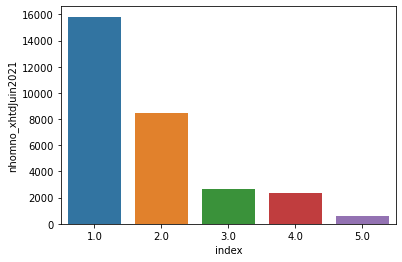

In [68]:
sns.barplot(data=df2['nhomno_xhtdJuin2021'].value_counts().reset_index(), x='index', y='nhomno_xhtdJuin2021')

In [69]:
df2 = df.reset_index()

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29952 entries, 0 to 29951
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         29952 non-null  int64  
 1   local_ref_1                   29952 non-null  object 
 2   vn_marital_status             29952 non-null  object 
 3   resid_province                29952 non-null  float64
 4   resid_district                29952 non-null  float64
 5   resid_wards                   27511 non-null  float64
 6   birth_incorp_date             29951 non-null  float64
 7   amount_week                   19224 non-null  float64
 8   max_amount_week               19224 non-null  float64
 9   min_amount_week               19224 non-null  float64
 10  distinct_payment_code_week    29952 non-null  float64
 11  count_payment_code_week       29952 non-null  float64
 12  distinct_trans_group_week     19597 non-null  float64
 13  d

## a. Demographics

In [71]:
df2.corr().loc['nhomno_xhtdJuin2021'].to_frame().sort_values(by='nhomno_xhtdJuin2021', ascending=False).T

,nhomno_xhtdJuin2021,index,sub_productJuin2021,product_codeJuin2021,min_amount_3month,categoryJuin2021,birth_incorp_date,rd_id,min_amount_month,count_payment_code_week,...,max_amount_3month,distinct_ref_no_week,most_act_juin2021_count,sectorJuin2021,distinct_trans_group_week,total_act_juin2021,distinct_payment_code_3month,distinct_payment_code_month,distinct_trans_group_month,distinct_trans_group_3month
nhomno_xhtdJuin2021,1.0,0.483659,0.15434,0.094618,0.075869,0.046361,0.018836,-0.000033,-0.002449,-0.006108,...,-0.130005,-0.14495,-0.146146,-0.146166,-0.151838,-0.173725,-0.206207,-0.224571,-0.252204,-0.272586


In [72]:
df2.groupby('nhomno_xhtdJuin2021').mean()

,index,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,...,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,categoryJuin2021,sub_productJuin2021,sectorJuin2021,product_codeJuin2021,birth_incorp_age
nhomno_xhtdJuin2021,,,,,,,,,,,,,,,,,,,,,
1.0,49478.097549,38.873010,400.288792,15665.122675,1985.741202,0.001159,0.002229,0.000514,0.282790,0.435810,...,30.629553,0.017455,0.005142,0.008412,0.005014,17499.858605,398.688191,1813.628001,24014.667614,37.258798
2.0,83413.800331,35.093455,369.828450,15020.216216,1985.520676,0.000634,0.001378,0.000529,0.222944,0.429820,...,17.380952,0.013678,0.001435,0.003047,0.001582,18170.654064,426.391185,1798.441871,24558.388351,37.479324
3.0,83497.128827,37.373040,385.593353,15162.728998,1986.460418,0.001037,0.000945,0.000309,0.169156,0.830844,...,7.500000,0.015957,0.001678,0.003731,0.001486,17319.045556,417.154700,1788.240851,24542.777072,36.539582
4.0,84484.264706,35.508824,370.552521,15140.232613,1986.052521,0.000250,0.000611,0.000249,0.082353,0.194958,...,20.000000,0.010638,0.001350,0.003141,0.000464,18391.648319,413.437096,1781.506723,24455.747899,36.947479
5.0,85620.441860,32.692691,338.440199,14986.439759,1986.098007,0.000512,0.000612,0.000342,0.093023,0.129568,...,NaN,NaN,0.000937,0.002302,0.000305,19120.257475,404.056657,1777.742525,24367.503322,36.901993


### a1. Mối quan hệ giữa nhóm nợ và độ tuổi

In [73]:
sqrt(np.var(df2['birth_incorp_age']))

7.332433733574574

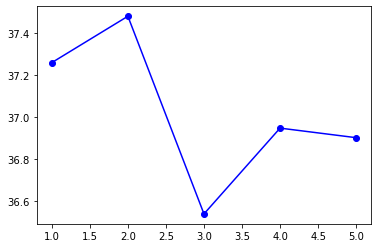

In [74]:
age_chart = plt.plot(df['nhomno_xhtdJuin2021'].unique(), df2.groupby('nhomno_xhtdJuin2021').mean()['birth_incorp_age'], color = 'b', marker='o')
age_chart
# Xét thấy độ tuổi của các nhóm nợ là tương đối giống nhau, vì vậy độ tuổi không phù hợp để đưa vào trong mô hình

### a2. Mối quan hệ giữa nhóm nợ và giới tính

In [75]:
gender_check = pd.crosstab(index=df2['nhomno_xhtdJuin2021'],
                             columns=df2['local_ref_1'],
                             normalize="index")
gender_check

local_ref_1,FEMALE,MALE
nhomno_xhtdJuin2021,,
1.0,0.363154,0.636846
2.0,0.180411,0.819589
3.0,0.189320,0.810680
4.0,0.184034,0.815966
5.0,0.212625,0.787375


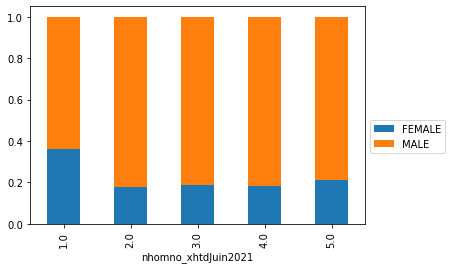

In [76]:
gender_chart = gender_check.plot(kind='bar', stacked=True)
gender_chart.legend(bbox_to_anchor =(1, 0.5))

#### *Xét thấy tỉ lệ khách hàng nữ ở trong khách hàng loại 1 cao hơn gần gấp đôi so với các nhóm xhtd khác,cân nhắc đưa vào mô hình

### a3. Mối quan hệ giữa nhóm nợ và tình trạng hôn nhân của khách hàng

In [77]:
marriage_check = pd.crosstab(index = df2['nhomno_xhtdJuin2021'],
                             columns = df2['vn_marital_status'],
                             normalize = "index")
marriage_check

vn_marital_status,Divorced,Married,Other,Partner,Seperated,Single,Widow
nhomno_xhtdJuin2021,,,,,,,
1.0,0.001074,0.637857,0.003791,0.000442,0.000063,0.356583,0.00019
2.0,0.000473,0.645203,0.006026,0.000118,0.000000,0.348181,0.00000
3.0,0.001120,0.587752,0.002614,0.001867,0.000000,0.405527,0.00112
4.0,0.000000,0.627311,0.002521,0.001681,0.000000,0.368487,0.00000
5.0,0.000000,0.576412,0.001661,0.000000,0.000000,0.421927,0.00000


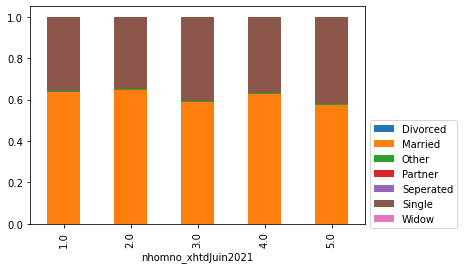

In [78]:
marriage_chart = marriage_check.plot(kind = 'bar', stacked = True)
marriage_chart.legend(bbox_to_anchor =(1, 0.5))
#Xét thấy tỉ lệ khách hàng theo tình trạng hôn nhân từng nhóm tương đối giống nhau, với married xoay quanh 57-63%
#và single là 34-42%, không đưa vào mô hình

### a4. Mối quan hệ giữa nhóm nợ và nhóm ngành kinh doanh của khách hàng

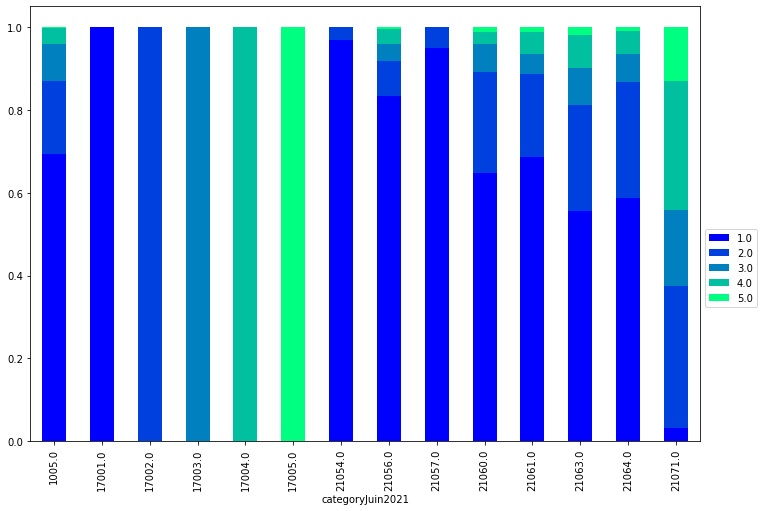

In [79]:
sector_check = pd.crosstab(index=df2['categoryJuin2021'],
                             columns=df2['nhomno_xhtdJuin2021'],
                             normalize="index")

# create plot
sector_chart = sector_check.plot(kind='bar', 
                    stacked=True, 
                    colormap='winter', 
                    figsize=(12, 8))
sector_chart.legend(bbox_to_anchor =(1, 0.5))

#có hai nhóm khách hàng thuộc nhóm 4 và 5 là 17004 và 17005, nên chú ý và đưa vào mô hình.
#ngoài ra có những nhóm khách hàng chỉ thuộc loại 1,2 hoặc 3.

## b. Transaction & Service

### b1.  Mối quan hệ tương quan giữa các biến 3 tháng trước - 1 tháng trước - 1 tuần trước:

In [80]:
df2[['max_amount_week','max_amount_month','max_amount_3month']].corr()

,max_amount_week,max_amount_month,max_amount_3month
max_amount_week,1.000000,0.706378,0.567885
max_amount_month,0.706378,1.000000,0.777731
max_amount_3month,0.567885,0.777731,1.000000


In [81]:
df2[['min_amount_week','min_amount_month','min_amount_3month']].corr()

,min_amount_week,min_amount_month,min_amount_3month
min_amount_week,1.000000,0.547432,0.459637
min_amount_month,0.547432,1.000000,0.916255
min_amount_3month,0.459637,0.916255,1.000000


In [82]:
df2[['amount_week','amount_month','amount_3month']].corr()

,amount_week,amount_month,amount_3month
amount_week,1.000000,0.801155,0.700543
amount_month,0.801155,1.000000,0.895673
amount_3month,0.700543,0.895673,1.000000


<AxesSubplot:>

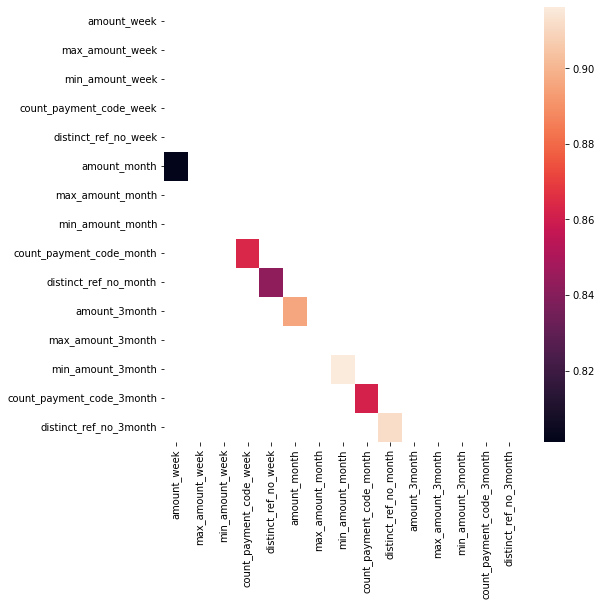

In [83]:
plt.figure(figsize=(8,8))
corr_rate = (df2[['amount_week','max_amount_week','min_amount_week','count_payment_code_week','distinct_ref_no_week',
         'amount_month','max_amount_month','min_amount_month','count_payment_code_month','distinct_ref_no_month',
         'amount_3month','max_amount_3month','min_amount_3month','count_payment_code_3month','distinct_ref_no_3month']].corr())
sns.heatmap(corr_rate[corr_rate>=0.8], mask=np.triu(corr_rate[corr_rate>=0.5]))

### b2. Thay đổi trong tổng số tiền giao dịch qua thời gian (trong quá khứ) & Nhóm nợ:

In [84]:
df2.loc[:,'3m_to_1m'] = df2.loc[:,'amount_month'] - df2.loc[:,'amount_3month']
df2.loc[:,'1m_to_1w'] = df2.loc[:,'amount_week'] - df2.loc[:,'amount_month']
df2.loc[:,'3m_to_1w'] = df2.loc[:,'amount_week'] - df2.loc[:,'amount_3month']

In [85]:
df2.loc[:,'3m_to_1m_positive'] = (df2.loc[:,'3m_to_1m'] >= 0)
df2.loc[:,'1m_to_1w_positive'] = (df2.loc[:,'1m_to_1w'] >= 0)
df2.loc[:,'3m_to_1w_positive'] = (df2.loc[:,'3m_to_1w'] >= 0)

In [86]:
cross_tab_check = pd.crosstab(index=df2['nhomno_xhtdJuin2021'],
                             columns=df2['3m_to_1m_positive'],
                             normalize="index")
cross_tab_check

3m_to_1m_positive,False,True
nhomno_xhtdJuin2021,,
1.0,0.305977,0.694023
2.0,0.390123,0.609877
3.0,0.455564,0.544436
4.0,0.662185,0.337815
5.0,0.488372,0.511628


<AxesSubplot:xlabel='nhomno_xhtdJuin2021'>

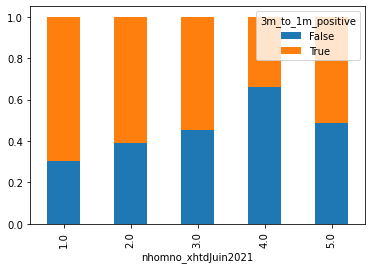

In [87]:
cross_tab_check.plot(kind='bar', stacked=True)
#Tỷ lệ các khách hàng có tổng số tiền giao dịch tăng lên qua thời gian (3 tháng - 1 tháng) cao hơn ở những nhóm nợ tốt hơn.
# ⇒ Có thể sử dụng biến thay đổi về số tiền giao dịch qua thời gian (3 tháng - 1 tháng) để phân loại và dự đoán biến nhóm nợ. 

In [88]:
df2[df2['3m_to_1m']>0][['amount_3month','amount_month','3m_to_1m']]

,amount_3month,amount_month,3m_to_1m
0,0.000014,0.000019,0.000005
1,0.000344,0.000468,0.000124
2,0.000028,0.000031,0.000004
3,0.000007,0.000011,0.000004
5,0.000051,0.000097,0.000047
...,...,...,...
29943,0.000031,0.000046,0.000015
29947,0.000013,0.000055,0.000042
29948,0.000006,0.000011,0.000005
29950,0.000002,0.000005,0.000003


#### Conclusion:
- Change in amount in the short term (3 month -> 1 month -> 1 week)

- Kết luận: Dùng change in amount 3 month - 1 month (vì 2 trường hợp còn lại không có nhiều sự khác biệt giữa các nhóm nợ)

### b3.  Tổng số tiền giao dịch trong vòng 1 tháng & Nhóm nợ:

<AxesSubplot:xlabel='max_month_binned', ylabel='Count'>

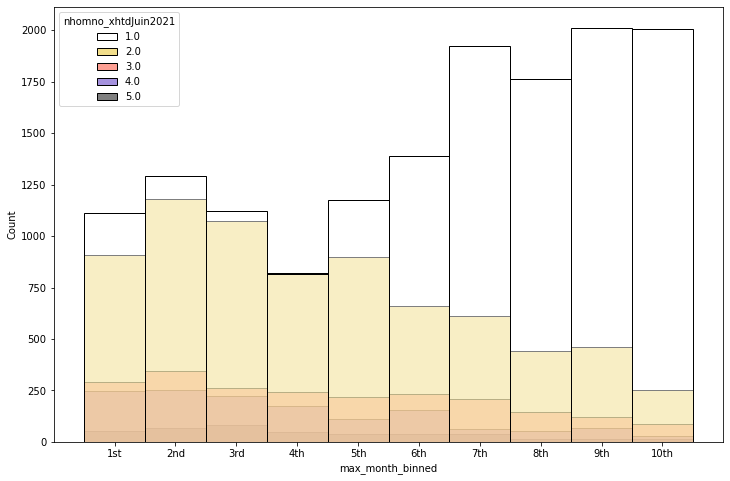

In [89]:
# nhomno VS max_amount_month: OK
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
df2.loc[:,'max_month_binned'] = pd.qcut(df2['max_amount_month'], q=10, labels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th'])

sns.histplot(data=df2, x="max_month_binned", hue='nhomno_xhtdJuin2021', palette='CMRmap_r', ax=ax1)

<AxesSubplot:xlabel='amount_month_binned', ylabel='Count'>

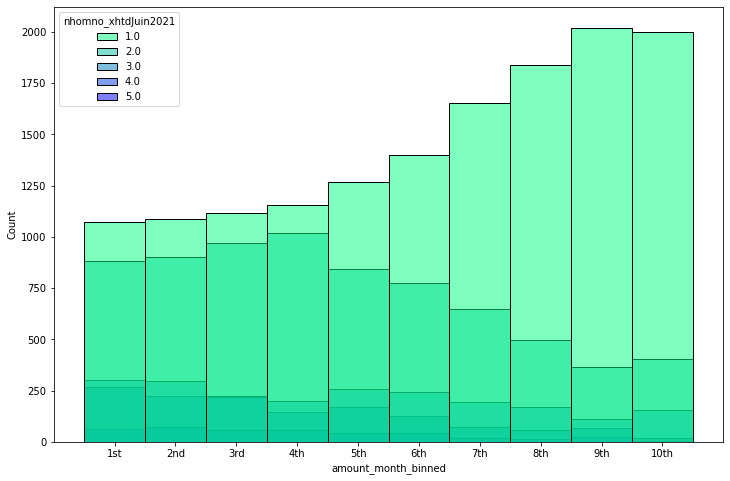

In [90]:
# nhomno VS amount_month:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
df2.loc[:,'amount_month_binned'] = pd.qcut(df2['amount_month'], q=10, labels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th'])

sns.histplot(data=df2, x="amount_month_binned", hue='nhomno_xhtdJuin2021', palette='winter_r', ax=ax1)

(0.0, 600.0)

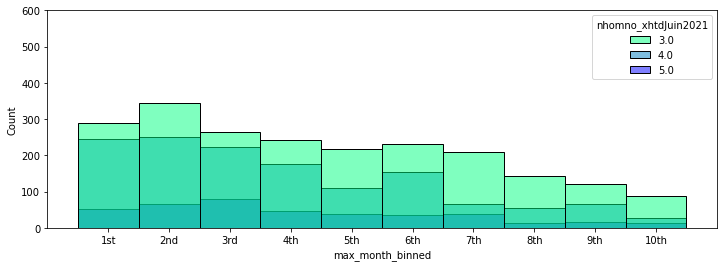

In [91]:
# Phân tích nhóm 3, 4, 5
plt.figure(figsize=(12,4))
sns.histplot(data=df2[df2['nhomno_xhtdJuin2021']>=3], x="max_month_binned", hue='nhomno_xhtdJuin2021', palette='winter_r')
plt.ylim(0,600)

 #### *Tổng số tiền giao dịch có thể là một biến giải thích tốt đối với việc phân loại nhóm nợ

### b4. Tỉ lệ khách hàng trong mỗi nhóm nợ, chia theo nhóm amount

<AxesSubplot:xlabel='amount_month_binned'>

<Figure size 720x576 with 0 Axes>

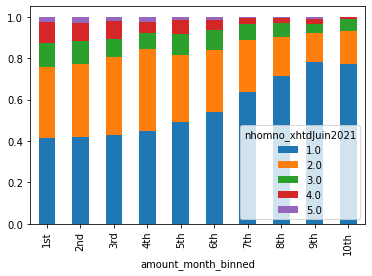

In [92]:
plt.figure(figsize=(10,8))
cross_tab_check2 = pd.crosstab(index=df2['amount_month_binned'],
                             columns=df2['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_check2.plot(kind='bar', stacked=True)

#### Suy đoán:
- Nhóm 1: Tập trung ở nhóm >6 
- Nhóm 2: Tập trung ở nhóm 1-5
- Nhóm 3: Tập trung ở 4-6
- Nhóm 4, 5: Tập trung trung bình thấp

#### Suy đoán: Những khách hàng có giá trị giao dịch cao dường như có xu hướng cao hơn thuộc nhóm đáng tin cậy.

==> amount_month can be a good predictor for the df2
- It's a little bit counterintuitive for group 2 - the % of customers with high max transaction values being in group 2 decreases as the value increases
- Decrease for group 4 (ok)
- Decrease for group 5 (ok)

### b5. Tương quan giữa số tiền giao dịch của tháng 3 và tháng 6


In [93]:
df2[['total_amt_mar2021','total_act_mar2021','most_act_mar2021_count']].corr()

,total_amt_mar2021,total_act_mar2021,most_act_mar2021_count
total_amt_mar2021,1.000000,0.290021,0.300497
total_act_mar2021,0.290021,1.000000,0.991323
most_act_mar2021_count,0.300497,0.991323,1.000000


In [94]:
df2[['total_amt_juin2021','total_act_juin2021','most_act_juin2021_count']].corr()

,total_amt_juin2021,total_act_juin2021,most_act_juin2021_count
total_amt_juin2021,1.000000,0.320554,0.329396
total_act_juin2021,0.320554,1.000000,0.981147
most_act_juin2021_count,0.329396,0.981147,1.000000


In [95]:
df2[['total_amt_mar2021','total_amt_juin2021','total_act_mar2021','total_act_juin2021']].corr()

,total_amt_mar2021,total_amt_juin2021,total_act_mar2021,total_act_juin2021
total_amt_mar2021,1.000000,0.610365,0.290021,0.217027
total_amt_juin2021,0.610365,1.000000,0.205404,0.320554
total_act_mar2021,0.290021,0.205404,1.000000,0.674379
total_act_juin2021,0.217027,0.320554,0.674379,1.000000


In [96]:
# Số tiền giao dịch trung bình mỗi lần
df2.loc[:,'avg_trans_month'] = df2.loc[:,'amount_month'] / df2.loc[:,'distinct_ref_no_month']
df2.loc[:,'avg_trans_month'].describe()

count    2.584400e+04
mean              inf
std               NaN
min      7.985714e-09
25%      6.533098e-06
50%      1.555784e-05
75%      4.300378e-05
max               inf
Name: avg_trans_month, dtype: float64

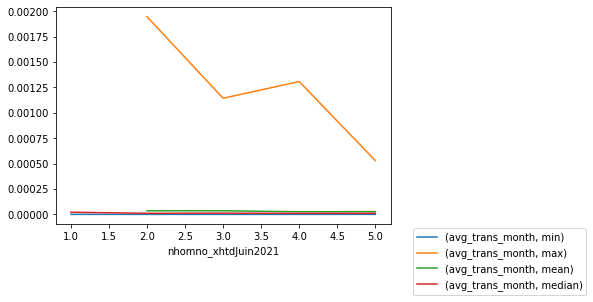

In [97]:
a = df2.groupby(['nhomno_xhtdJuin2021']).agg({'avg_trans_month': ['min','max','mean','median']}).plot()
plt.legend(bbox_to_anchor=(1.6,0.005))
# --> Không có ý nghĩa gì lắm

# 3. Phân biệt 2 nhóm 'đáng tin cậy' & ' không đáng tin cậy' ?
- Có nhiều interval trùng nhau 
- Vấn đề: Cần tìm ra điểm đặc trưng của mỗi nhóm -> mục đích: chia thành 2 nhóm (tin cậy & không tin cậy)
- Đã tách nhóm 1, gộp 4+5 --> Giờ cần tìm điểm đặc trưng & ngưỡng phân biệt giữa 2, 3, 4 để tách thành 2 nửa
- Khi predict thì làm thế nào? Predict 1+2, 3+4+5 hay tốt vs không tốt?

<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='amount_month'>

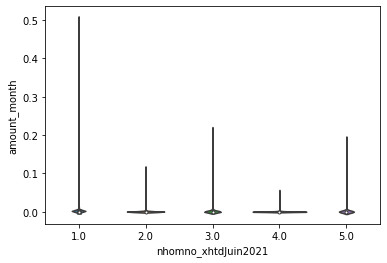

In [98]:
sns.violinplot(data=df2, x='nhomno_xhtdJuin2021', y='amount_month')

<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='min_amount_month'>

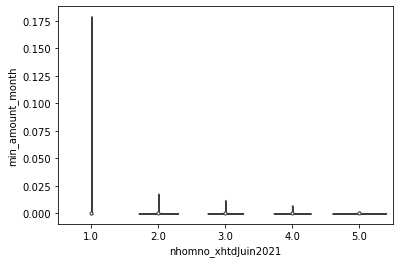

In [99]:
sns.violinplot(data=df2, x='nhomno_xhtdJuin2021', y='min_amount_month')

<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='count_payment_code_week'>

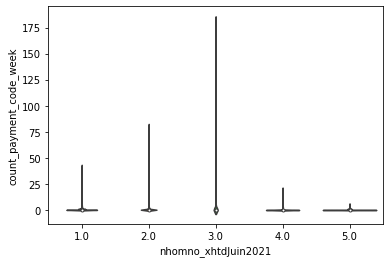

In [100]:
sns.violinplot(data=df2, x='nhomno_xhtdJuin2021', y='count_payment_code_week')

<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='distinct_ref_no_week'>

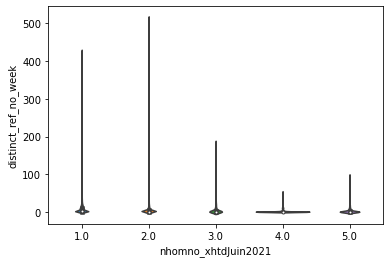

In [101]:
sns.violinplot(data=df2, x='nhomno_xhtdJuin2021', y='distinct_ref_no_week')

In [102]:
df2['nhomno_xhtdJuin2021'].value_counts()

1.0    15828
2.0     8464
3.0     2678
4.0     2380
5.0      602
Name: nhomno_xhtdJuin2021, dtype: int64

#### a. Phân tích Tổng số tiền giao dịch trong tháng theo từng nhóm nợ

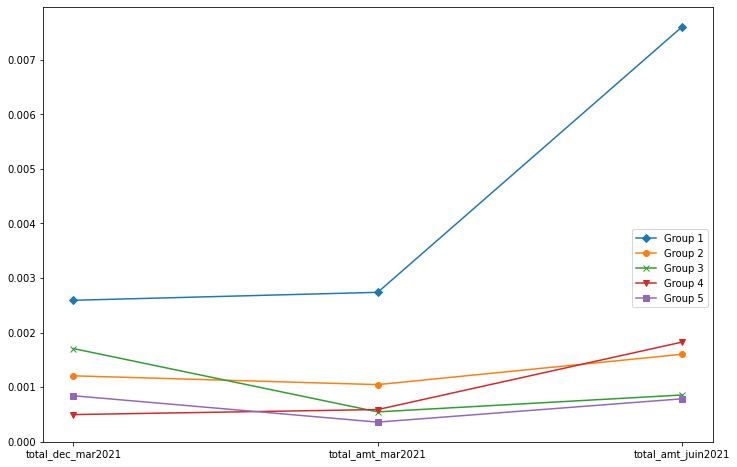

In [105]:
mar = df2.groupby('nhomno_xhtdJuin2021')['total_amt_mar2021'].mean().reset_index().drop('nhomno_xhtdJuin2021', axis=1)
jun = df2.groupby('nhomno_xhtdJuin2021')['total_amt_juin2021'].mean().reset_index().drop('nhomno_xhtdJuin2021', axis=1)
dec = df2.groupby('nhomno_xhtdJuin2021')['amount_month'].mean().reset_index()
amount_dec_mar_jun = pd.concat([dec, mar, jun], axis=1).set_index('nhomno_xhtdJuin2021')
amount_dec_mar_jun = amount_dec_mar_jun.T.rename(index={'amount_month': 'total_dec_mar2021'})

figure = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,0], label='Group 1', marker='D')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,1], label='Group 2', marker='o')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,2], label='Group 3', marker='x')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,3], label='Group 4', marker='v')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,4], label='Group 5', marker='s')

plt.legend(bbox_to_anchor =(1, 0.5))

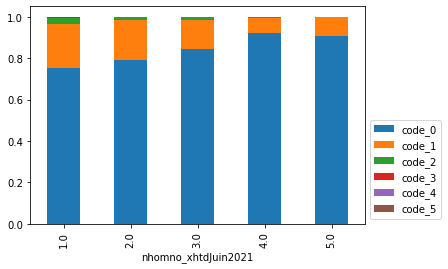

In [106]:
# Tìm tỉ lệ sử dụng so với # khách hàng mỗi debt group --> Tìm xem dịch vụ nào là tốt

payment_code = df2.groupby(['nhomno_xhtdJuin2021', 'distinct_payment_code_week']).size().unstack().replace(np.nan, 0)

payment_code['total'] = payment_code.sum(axis=1)
payment_code['code_0'] = payment_code.iloc[:,0] / payment_code.iloc[:,6]
payment_code['code_1'] = payment_code.iloc[:,1] / payment_code.iloc[:,6]
payment_code['code_2'] = payment_code.iloc[:,2] / payment_code.iloc[:,6]
payment_code['code_3'] = payment_code.iloc[:,3] / payment_code.iloc[:,6]
payment_code['code_4'] = payment_code.iloc[:,4] / payment_code.iloc[:,6]
payment_code['code_5'] = payment_code.iloc[:,5] / payment_code.iloc[:,6]
payment_code.drop([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 'total'], axis=1, inplace=True)

axis2 = payment_code.plot(kind='bar', stacked=True)
axis2.legend(bbox_to_anchor =(1, 0.5))

### b. Thực hiện phân tích Principal Component Analysis PCA

In [108]:
amount = df[['nhomno_xhtdJuin2021',
         'amount_week','max_amount_week','min_amount_week','count_payment_code_week','distinct_trans_group_week','distinct_ref_no_week',
         'amount_month','max_amount_month','min_amount_month','count_payment_code_month','distinct_trans_group_month','distinct_ref_no_month',
         'amount_3month','max_amount_3month','min_amount_3month','count_payment_code_3month','distinct_trans_group_3month','distinct_ref_no_3month']][df['nhomno_xhtdJuin2021'].notnull()].dropna(how='any')

In [109]:
amount.isnull().sum()

nhomno_xhtdJuin2021            0
amount_week                    0
max_amount_week                0
min_amount_week                0
count_payment_code_week        0
distinct_trans_group_week      0
distinct_ref_no_week           0
amount_month                   0
max_amount_month               0
min_amount_month               0
count_payment_code_month       0
distinct_trans_group_month     0
distinct_ref_no_month          0
amount_3month                  0
max_amount_3month              0
min_amount_3month              0
count_payment_code_3month      0
distinct_trans_group_3month    0
distinct_ref_no_3month         0
dtype: int64

In [110]:
amount_train, amount_test = train_test_split(amount, test_size = 0.3, random_state = 16)

In [111]:
pca = PCA(n_components=5)
pca.fit(amount_train)
pca_data = pca.transform(amount_train)

Text(0.5, 1.0, '% of Explained Variance')

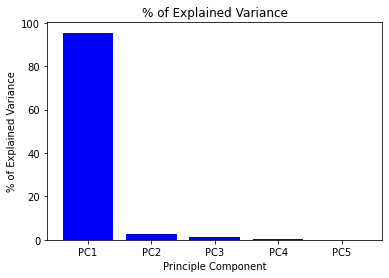

In [118]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, color = 'b', tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principle Component')
plt.title('% of Explained Variance')

Text(0, 0.5, 'PC2 - 2.89%')

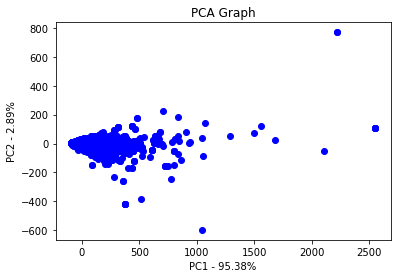

In [117]:
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2, color = 'b')
plt.title('PCA Graph')
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

<AxesSubplot:>

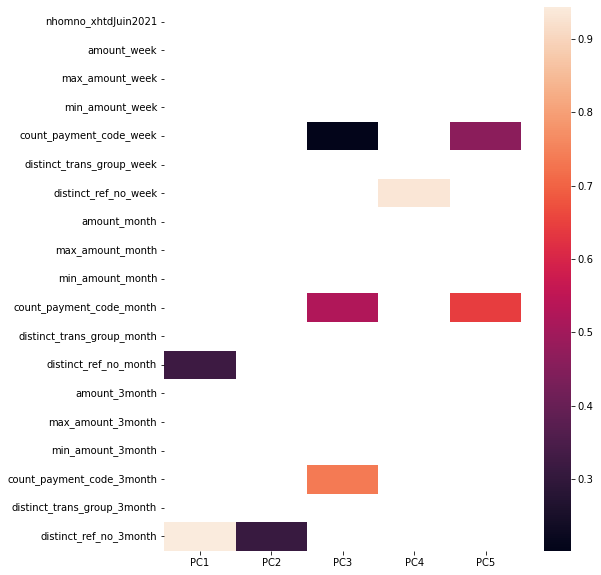

In [120]:
plt.figure(figsize=(8,10))
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=amount_train.columns)
sns.heatmap(data=loadings[loadings>=0.2])

#### Phán đoán:
- Principal Component 1 giải thích hầu hết biến trong dataset
- PC1 (Principal Component 1) liên quan tới distinct_ref_no_month và distinct_ref_no_3month

# 4. MODELLING: 

### - Logistic Regression
### - Decision Tree
### - k-NN

## 4.1. Datasets:

### Proprocessing step: Dummy variables + Drop null

In [121]:
df_process = df2.drop(columns=['savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo'])\
            .replace(to_replace={'nhomno_xhtdJuin2021':{1:0, 
                                                        2:0,
                                                        3:0,
                                                        4:1,
                                                        5:1}})\
            .dropna(subset=['amount_month','min_amount_month','distinct_ref_no_month'])

In [128]:
df_process_dummies = pd.get_dummies(data=df_process,
                     columns=["local_ref_1","vn_marital_status","most_act_juin2021","loaikyhanJuin2021"], 
                     prefix="DUM", prefix_sep="_",
                     drop_first=True)
df_process_dummies.columns

Index(['index', 'resid_province', 'resid_district', 'resid_wards',
       'birth_incorp_date', 'amount_week', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', 'total_amt_mar2021', 'most_act_juin2021_count',
       'total_act_juin2021', 'total_amt_juin2021', 'rd_id', 'balanceJuin2021',
       'nominal_interestJuin2021', 'real_interestJuin2021',
       'nhomno_xhtdJuin2021', 'categoryJuin2021', 'sub_productJuin2021'

In [164]:
df3 = df_process_dummies.reset_index()

In [166]:
X_ori = df3[[ 'amount_month','min_amount_month','distinct_payment_code_month','count_payment_code_month','distinct_ref_no_month',
        'DUM_MALE','DUM_Married', 'DUM_Other', 'DUM_Partner', 'DUM_Single', 'DUM_Widow',
        'DUM_phi tai chinh', 'DUM_rut tien atm', 'DUM_thanh toan', 'DUM_tiet kiem', 'DUM_vay', 
        'DUM_NH', 'DUM_TH',    
        'categoryJuin2021', 'sectorJuin2021','balanceJuin2021','3m_to_1m_positive','nominal_interestJuin2021'
        ]].replace(np.nan, 0)
y_ori = df3['nhomno_xhtdJuin2021'].astype('int')

In [167]:
X_ori_train, X_ori_test, y_ori_train, y_ori_test = train_test_split(X_ori, y_ori, test_size=0.3, random_state=1)

### a. DF3: Thuat toan Upsampling (SMOTE)

In [168]:
oversample_ori = SMOTE()

In [169]:
oversample_ori.fit_resample(X_ori, y_ori)

AttributeError: 'NoneType' object has no attribute 'split'

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

NameError: name 'X' is not defined

### b. DF4: Thuat toan: Downsampling + Upsampling

In [138]:
group_0_tree = df3[df3['nhomno_xhtdJuin2021']==0]
group_1_tree = df3[df3['nhomno_xhtdJuin2021']==1]

In [139]:
group0_down_tree = resample(group_0_tree,
                   replace=True,
                   n_samples=len(group_1_tree)+10000,
                   random_state=42)
df3_down = pd.concat([group0_down_tree, group_1_tree]).replace(np.nan, 0)

In [141]:
print(group_0_tree.shape)
print(group_1_tree.shape)

(24073, 68)
(1771, 68)


In [142]:
df4_down.shape

(13542, 68)

In [146]:
X_model = df4_down[[
            'amount_month','min_amount_month','distinct_payment_code_month','count_payment_code_month','distinct_ref_no_month',
            'DUM_MALE', 'DUM_Married',
           'DUM_Other', 'DUM_Partner', 'DUM_Seperated', 'DUM_Single', 'DUM_Widow',
           'DUM_GIAO DICH RUT TIEN ATM', 'DUM_GIAO DICH THANH TOAN',
           'DUM_GIAO DICH TIET KIEM', 'DUM_GIAO DICH VAY',
           'DUM_Giao dich chuyen khoan', 'DUM_Giao dich thanh toan', 'DUM_NH',
           'DUM_TH',
        'categoryJuin2021', 'sectorJuin2021','balanceJuin2021','3m_to_1m_positive','nominal_interestJuin2021'
        ]].replace(np.nan, 0)
y_model = df4_down['nhomno_xhtdJuin2021'].astype('int')

In [147]:
oversample_down = SMOTE()
X_model_bal, y_model_bal = oversample_down.fit_resample(X_model, y_model)

AttributeError: 'NoneType' object has no attribute 'split'

In [74]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_model_bal, y_model_bal, test_size=0.3, random_state=2)

# 4.2. Decision Tree: Classification

### a. Dùng các parameters mặc định:

##### (1) Train model

In [148]:
# Decision Tree: Gini

clf_tree_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 42)
clf_tree_gini.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [76]:
clf_tree_gini.tree_.max_depth

36

In [77]:
clf_tree_gini.tree_.node_count

3023

In [78]:
yhat_tree_gini = clf_tree_gini.predict(X_test)

In [79]:
confusion_matrix(y_test, yhat_tree_gini)

array([[6827,  374],
       [ 250, 6995]], dtype=int64)

In [80]:
round(accuracy_score(y_test,yhat_tree_gini)*100,2)

95.68

In [81]:
print(classification_report(y_test, yhat_tree_gini))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7201
           1       0.95      0.97      0.96      7245

    accuracy                           0.96     14446
   macro avg       0.96      0.96      0.96     14446
weighted avg       0.96      0.96      0.96     14446



fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree_gini, 
                   feature_names=X_train.columns,  
                   class_names=y_train.name,
                   filled=True)

##### (2) Test trên toàn bộ dataset

In [82]:
yhat_tree_gini_full = clf_tree_gini.predict(X_ori)

In [83]:
confusion_matrix(y_ori, yhat_tree_gini_full)

array([[23702,   374],
       [   37,  1734]], dtype=int64)

In [84]:
accuracy_score(y_ori,yhat_tree_gini_full)*100

98.40987348628467

In [85]:
print(classification_report(y_ori, yhat_tree_gini_full))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24076
           1       0.82      0.98      0.89      1771

    accuracy                           0.98     25847
   macro avg       0.91      0.98      0.94     25847
weighted avg       0.99      0.98      0.98     25847



### b. Giảm độ phức tạp của mô hình

##### (1) Train model

min_samples_split=10

In [86]:
# Decision Tree: Gini

clf_tree_gini_depth = tree.DecisionTreeClassifier(criterion = "gini", max_features=3, random_state=42)
clf_tree_gini_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_features=3, random_state=42)

In [87]:
yhat_tree_gini_depth = clf_tree_gini_depth.predict(X_test)

In [88]:
confusion_matrix(y_test, yhat_tree_gini_depth)

array([[6732,  469],
       [ 312, 6933]], dtype=int64)

In [89]:
print(classification_report(y_test, yhat_tree_gini_depth))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7201
           1       0.94      0.96      0.95      7245

    accuracy                           0.95     14446
   macro avg       0.95      0.95      0.95     14446
weighted avg       0.95      0.95      0.95     14446



##### (2) Test trên toàn bộ dataset

In [90]:
yhat_tree_gini_depth_full = clf_tree_gini_depth.predict(X_ori)

In [91]:
confusion_matrix(y_ori, yhat_tree_gini_depth_full)

array([[23572,   504],
       [   60,  1711]], dtype=int64)

In [92]:
accuracy_score(y_ori,yhat_tree_gini_depth_full)*100

97.81792857971911

In [93]:
print(classification_report(y_ori, yhat_tree_gini_depth_full))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24076
           1       0.77      0.97      0.86      1771

    accuracy                           0.98     25847
   macro avg       0.88      0.97      0.92     25847
weighted avg       0.98      0.98      0.98     25847



### c. Bagging

In [94]:
bagging = BaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(bagging, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
bagging.fit(X_train, y_train)

BaggingClassifier()

In [95]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.971 (0.004)


In [96]:
yhat_test_bagging = bagging.predict(X_test)

In [97]:
confusion_matrix(y_test, yhat_test_bagging)

array([[6987,  214],
       [ 147, 7098]], dtype=int64)

In [98]:
print(classification_report(y_test, yhat_test_bagging))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7201
           1       0.97      0.98      0.98      7245

    accuracy                           0.98     14446
   macro avg       0.98      0.97      0.98     14446
weighted avg       0.98      0.98      0.98     14446



In [99]:
yhat_test_ori = bagging.predict(X_ori)

In [100]:
confusion_matrix(y_ori, yhat_test_ori)

array([[23850,   226],
       [   45,  1726]], dtype=int64)

In [101]:
print(classification_report(y_ori, yhat_test_ori))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24076
           1       0.88      0.97      0.93      1771

    accuracy                           0.99     25847
   macro avg       0.94      0.98      0.96     25847
weighted avg       0.99      0.99      0.99     25847



### Extra 1: Train trên dataset đã Downsampling + Upsampling

In [102]:
clf_tree_gini_depth = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=10, random_state=42)
clf_tree_gini_depth.fit(X_bal_train, y_bal_train)

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [103]:
yhat_tree_gini_bal = clf_tree_gini_depth.predict(X_bal_test)

In [104]:
print(classification_report(y_bal_test, yhat_tree_gini_bal))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3564
           1       0.92      0.95      0.93      3499

    accuracy                           0.93      7063
   macro avg       0.93      0.93      0.93      7063
weighted avg       0.93      0.93      0.93      7063



In [105]:
yhat___ = clf_tree_gini_depth.predict(X_ori)
print(classification_report(y_ori, yhat___))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     24076
           1       0.50      0.94      0.65      1771

    accuracy                           0.93     25847
   macro avg       0.75      0.94      0.81     25847
weighted avg       0.96      0.93      0.94     25847



In [106]:
confusion_matrix(y_ori, yhat___)

array([[22391,  1685],
       [   98,  1673]], dtype=int64)

### Extra 2: Train trên dataset gốc

In [107]:
bagging = BaggingClassifier()
bagging.fit(X_ori_train, y_ori_train)

BaggingClassifier()

In [108]:
yhat_test_bagging = bagging.predict(X_ori_test)

In [109]:
confusion_matrix(y_ori_test, yhat_test_bagging)

array([[7195,   21],
       [ 179,  360]], dtype=int64)

In [110]:
print(classification_report(y_ori_test, yhat_test_bagging))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7216
           1       0.94      0.67      0.78       539

    accuracy                           0.97      7755
   macro avg       0.96      0.83      0.88      7755
weighted avg       0.97      0.97      0.97      7755



# 4.3. kNN:

In [111]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knn.fit(X_ori_train,y_ori_train)
    y_pred = knn.predict(X_ori_test)
    accuracy_scores[i] = accuracy_score(y_ori_test,y_pred)

Optimal k: 1


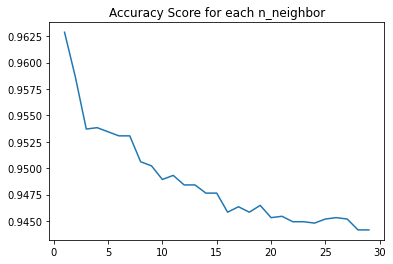

In [112]:
# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
plt.title('Accuracy Score for each n_neighbor')
print('Optimal k: {}'.format(optimal_k[0]))

In [113]:
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, algorithm = 'brute') # p=2: Euclidean distance; brute: có bao nhiêu item so sánh bấy nhiêu -> áp dụng cho small dataset only
clf_knn.fit(X_ori_train, y_ori_train)

KNeighborsClassifier(algorithm='brute')

In [114]:
yhat_knn_test = clf_knn.predict(X_ori_test)

confusion_matrix(y_ori_test,yhat_knn_test)

array([[7122,   94],
       [ 267,  272]], dtype=int64)

In [115]:
print(classification_report(y_ori_test,yhat_knn_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7216
           1       0.74      0.50      0.60       539

    accuracy                           0.95      7755
   macro avg       0.85      0.75      0.79      7755
weighted avg       0.95      0.95      0.95      7755



In [116]:
yhat_knn_ori = clf_knn.predict(X_ori)

confusion_matrix(y_ori,yhat_knn_ori)

array([[23863,   213],
       [  735,  1036]], dtype=int64)

In [117]:
print(classification_report(y_ori,yhat_knn_ori))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24076
           1       0.83      0.58      0.69      1771

    accuracy                           0.96     25847
   macro avg       0.90      0.79      0.83     25847
weighted avg       0.96      0.96      0.96     25847



## 4.4. Logistic Regression: 

### Train trên tập downsampling + upsampling

In [170]:
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_bal_train,y_bal_train)

NameError: name 'X_bal_train' is not defined

In [119]:
yhat_logreg_train = logreg1.predict(X_bal_train)
yhat_logreg_test = logreg1.predict(X_bal_test)

In [120]:
# Train set:
confusion_matrix(y_bal_train, yhat_logreg_train)

array([[5089, 3118],
       [2576, 5696]], dtype=int64)

In [121]:
print(classification_report(y_bal_train, yhat_logreg_train))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      8207
           1       0.65      0.69      0.67      8272

    accuracy                           0.65     16479
   macro avg       0.66      0.65      0.65     16479
weighted avg       0.66      0.65      0.65     16479



In [122]:
# Test set:
confusion_matrix(y_bal_test, yhat_logreg_test)

array([[2249, 1315],
       [1051, 2448]], dtype=int64)

In [123]:
print(classification_report(y_bal_test, yhat_logreg_test))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      3564
           1       0.65      0.70      0.67      3499

    accuracy                           0.67      7063
   macro avg       0.67      0.67      0.66      7063
weighted avg       0.67      0.67      0.66      7063



In [124]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_bal_test))]
# predict probabilities
lr_probs = logreg1.predict_proba(X_bal_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_bal_test, ns_probs)
lr_auc = roc_auc_score(y_bal_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.735


Text(0.5, 1.0, 'ROC Curve')

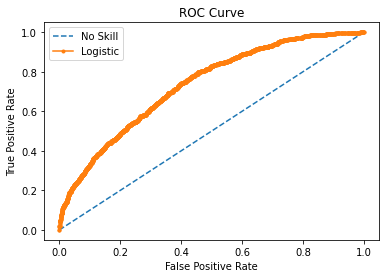

In [125]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_bal_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_bal_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC Curve')
# show the plot

Logistic: f1=0.665 auc=0.725


Text(0.5, 1.0, 'Precision-Recall Tradeoff')

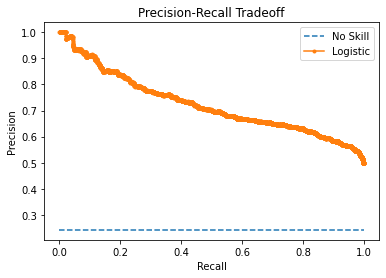

In [126]:
lr_precision, lr_recall, _ = precision_recall_curve(y_bal_test, lr_probs)
lr_f1, lr_auc = accuracy_score(y_bal_test, yhat_logreg_test), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_bal_test[y_bal_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.title('Precision-Recall Tradeoff')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.735


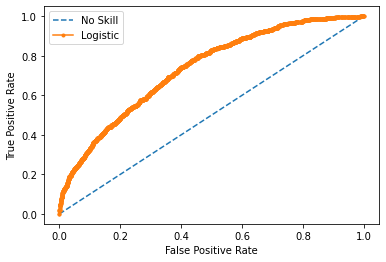

In [127]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_bal_test))]
# predict probabilities
lr_probs = logreg1.predict_proba(X_bal_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_bal_test, ns_probs)
lr_auc = roc_auc_score(y_bal_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, thresholds_ns = roc_curve(y_bal_test, ns_probs)
lr_fpr, lr_tpr, thresholds_lr = roc_curve(y_bal_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

Best Threshold=0.487568, G-Mean=0.668


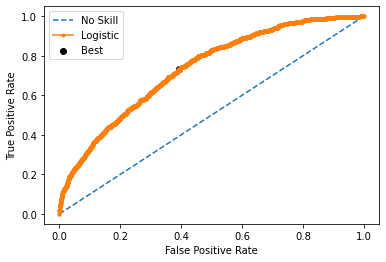

In [128]:
# calculate the g-mean for each threshold
gmeans = sqrt(lr_tpr * (1-lr_fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_lr[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.scatter(lr_fpr[ix], lr_tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot

In [129]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_bal_test, to_labels(lr_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.330, F-Score=0.71150


In [130]:
yhat_cw_test = np.where(logreg1.predict_proba(X_test)[:,1] > thresholds[ix], 1, 0)

In [131]:
yhat_cw_train = np.where(logreg1.predict_proba(X_train)[:,1] > thresholds[ix], 1, 0)

In [132]:
confusion_matrix(y_train, yhat_cw_train)

array([[ 5789, 11086],
       [ 1574, 15257]], dtype=int64)

In [133]:
print(classification_report(y_train, yhat_cw_train))

              precision    recall  f1-score   support

           0       0.79      0.34      0.48     16875
           1       0.58      0.91      0.71     16831

    accuracy                           0.62     33706
   macro avg       0.68      0.62      0.59     33706
weighted avg       0.68      0.62      0.59     33706



In [134]:
confusion_matrix(y_test, yhat_cw_test)

array([[2517, 4684],
       [ 693, 6552]], dtype=int64)

In [135]:
print(classification_report(y_test, yhat_cw_test))

              precision    recall  f1-score   support

           0       0.78      0.35      0.48      7201
           1       0.58      0.90      0.71      7245

    accuracy                           0.63     14446
   macro avg       0.68      0.63      0.60     14446
weighted avg       0.68      0.63      0.60     14446



### Train trên tập gốc

In [136]:
# class_weight_logreg1 = class_weight.compute_class_weight('balanced',np.unique(df_encoded_dummies['nhomno_xhtdJuin2021']),df_encoded_dummies['nhomno_xhtdJuin2021'])

logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [137]:
yhat_logreg_train = logreg1.predict(X_train)
yhat_logreg_test = logreg1.predict(X_test)

In [138]:
# Train set:
confusion_matrix(y_train, yhat_logreg_train)

array([[ 9762,  7113],
       [ 4576, 12255]], dtype=int64)

In [139]:
print(classification_report(y_train, yhat_logreg_train))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63     16875
           1       0.63      0.73      0.68     16831

    accuracy                           0.65     33706
   macro avg       0.66      0.65      0.65     33706
weighted avg       0.66      0.65      0.65     33706



In [140]:
# Test set:
confusion_matrix(y_test, yhat_logreg_test)

array([[4272, 2929],
       [1961, 5284]], dtype=int64)

In [141]:
print(classification_report(y_test, yhat_logreg_test))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      7201
           1       0.64      0.73      0.68      7245

    accuracy                           0.66     14446
   macro avg       0.66      0.66      0.66     14446
weighted avg       0.66      0.66      0.66     14446



In [142]:
logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X_train,y_train)
yhat_logreg_ori = logreg2.predict(X_ori)

In [143]:
# Train set:
confusion_matrix(y_ori, yhat_logreg_ori)

array([[14034, 10042],
       [  508,  1263]], dtype=int64)

In [144]:
print(classification_report(y_ori, yhat_logreg_ori))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73     24076
           1       0.11      0.71      0.19      1771

    accuracy                           0.59     25847
   macro avg       0.54      0.65      0.46     25847
weighted avg       0.91      0.59      0.69     25847



### a. Neural Network Classifier

In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [146]:
mlp = MLPClassifier(hidden_layer_sizes=(23,23,23), activation='relu', solver='adam', max_iter=10000)

mlp.fit(X_bal_train,y_bal_train)

predict_train = mlp.predict(X_bal_train)
predict_test = mlp.predict(X_bal_test)

In [147]:
print(confusion_matrix(y_bal_test,predict_test))
print(classification_report(y_bal_test,predict_test))

[[ 468 3096]
 [ 147 3352]]
              precision    recall  f1-score   support

           0       0.76      0.13      0.22      3564
           1       0.52      0.96      0.67      3499

    accuracy                           0.54      7063
   macro avg       0.64      0.54      0.45      7063
weighted avg       0.64      0.54      0.45      7063



# 5. EDA AFTER RESAMPLING

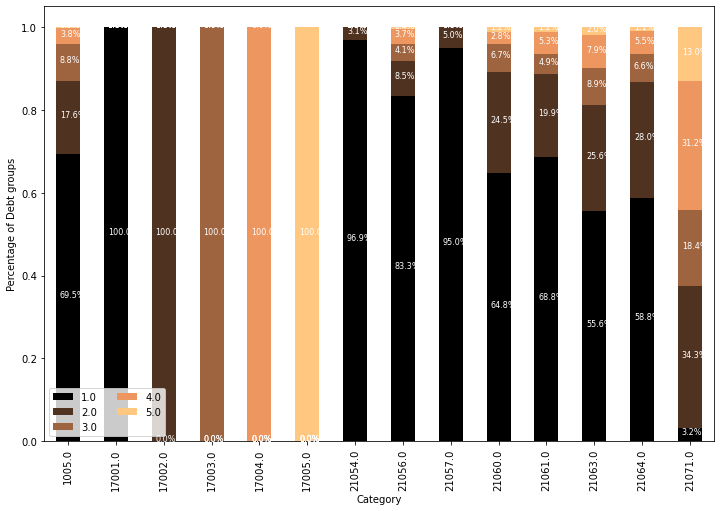

In [148]:
cross_tab_prop_status = pd.crosstab(index=notna_nhomno['categoryJuin2021'],
                             columns=notna_nhomno['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_status = pd.crosstab(index=df3_down['categoryJuin2021'],
                        columns=df3_down['nhomno_xhtdJuin2021'])

# create plot
cross_tab_prop_status.plot(kind='bar', 
                        stacked=True, 
                        colormap='copper', 
                        figsize=(12, 8))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Category")
plt.ylabel("Percentage of Debt groups")


for n, x in enumerate([*cross_tab_status.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_status.loc[x],
                                   cross_tab_prop_status.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8,
                 fontweight="light")

plt.show()
# hầu hết các nhóm sản phẩm tín dụng đều do nhóm tốt sử dụng, chỉ có 2 sản phẩm tín dụng dành cho nhóm xấu 
# điều này có nghĩa dựa vào nhóm sản phẩm tín dụng, có thể dự đoán xác suất khách hàng là tốt hay xấu

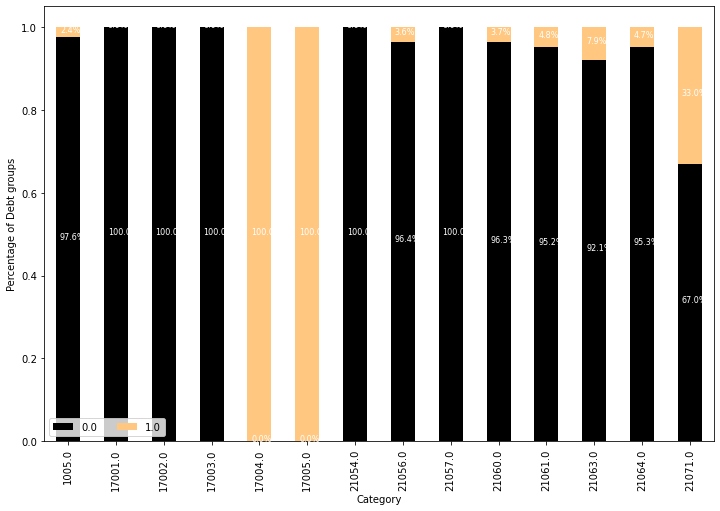

In [149]:
cross_tab_prop_status = pd.crosstab(index=df3['categoryJuin2021'],
                             columns=df3['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_status = pd.crosstab(index=df3_down['categoryJuin2021'],
                        columns=df3_down['nhomno_xhtdJuin2021'])

# create plot
cross_tab_prop_status.plot(kind='bar', 
                        stacked=True, 
                        colormap='copper', 
                        figsize=(12, 8))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Category")
plt.ylabel("Percentage of Debt groups")


for n, x in enumerate([*cross_tab_status.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_status.loc[x],
                                   cross_tab_prop_status.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8,
                 fontweight="light")

plt.show()
# hầu hết các nhóm sản phẩm tín dụng đều do nhóm tốt sử dụng, chỉ có 2 sản phẩm tín dụng dành cho nhóm xấu 
# điều này có nghĩa dựa vào nhóm sản phẩm tín dụng, có thể dự đoán xác suất khách hàng là tốt hay xấu

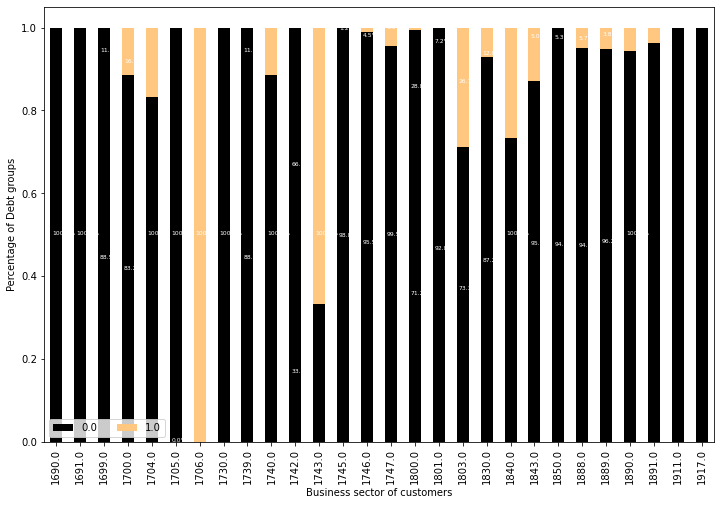

In [150]:
cross_tab_prop_status = pd.crosstab(index=df3['sectorJuin2021'],
                             columns=df3['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_status = pd.crosstab(index=df3_down['sectorJuin2021'],
                        columns=df3_down['nhomno_xhtdJuin2021'])

# create plot
cross_tab_prop_status.plot(kind='bar', 
                        stacked=True, 
                        colormap='copper', 
                        figsize=(12, 8))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Business sector of customers")
plt.ylabel("Percentage of Debt groups")


for n, x in enumerate([*cross_tab_status.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_status.loc[x],
                                   cross_tab_prop_status.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=6,
                 fontweight="light")

plt.show()

In [151]:
df_eda = pd.concat([pd.DataFrame(X_model_bal), pd.DataFrame(y_model_bal)], axis=1)

In [152]:
# Merge dummies into 1 column (Status)
df_eda['DUM_Married'] = df_eda['DUM_Married'].replace([0], '')
df_eda['DUM_Married'] = df_eda['DUM_Married'].replace([1], 'Married')
df_eda['DUM_Other'] = df_eda['DUM_Other'].replace([0], '')
df_eda['DUM_Other'] = df_eda['DUM_Other'].replace([1], 'Others')
df_eda['DUM_Partner'] = df_eda['DUM_Partner'].replace([0], '')
df_eda['DUM_Partner'] = df_eda['DUM_Partner'].replace([1], 'Partner')
df_eda['DUM_Single'] = df_eda['DUM_Single'].replace([0], '')
df_eda['DUM_Single'] = df_eda['DUM_Single'].replace([1], 'Single')
df_eda['DUM_Widow'] = df_eda['DUM_Widow'].replace([0], '')
df_eda['DUM_Widow'] = df_eda['DUM_Widow'].replace([1], 'Widow')
df_eda['Status'] = df_eda['DUM_Married'].fillna('') + df_eda['DUM_Other'].fillna('') + df_eda['DUM_Partner'].fillna('') + df_eda['DUM_Single'].fillna('') + df_eda['DUM_Widow'].fillna('')

# Merge dummies into 1 column (Period)
df_eda['DUM_NH'] = df_eda['DUM_NH'].replace([0], np.nan)
df_eda['DUM_NH'] = df_eda['DUM_NH'].replace([1], 'NH')
df_eda['DUM_TH'] = df_eda['DUM_TH'].replace([0], np.nan)
df_eda['DUM_TH'] = df_eda['DUM_TH'].replace([1], 'TH')
df_eda['Kyhan'] = df_eda['DUM_NH'].fillna('') + df_eda['DUM_TH'].fillna('')
df_eda['Kyhan'] = df_eda['Kyhan'].replace('', 'DH')
df_eda

,amount_month,min_amount_month,distinct_payment_code_month,count_payment_code_month,distinct_ref_no_month,DUM_MALE,DUM_Married,DUM_Other,DUM_Partner,DUM_Single,...,DUM_NH,DUM_TH,categoryJuin2021,sectorJuin2021,balanceJuin2021,3m_to_1m_positive,nominal_interestJuin2021,nhomno_xhtdJuin2021,Status,Kyhan
0,0.001860,2.960000e-06,2.000000,2.000000,31.000000,0,Married,,,,...,NaN,TH,21064.000000,1891.00000,0.000000,True,0.000000,0,Married,TH
1,0.003659,2.960000e-06,1.000000,3.000000,79.000000,0,Married,,,,...,NH,NaN,17002.000000,1891.00000,0.000000,True,0.000000,0,Married,NH
2,0.000267,1.770000e-06,3.000000,4.000000,38.000000,0,,,,Single,...,NaN,TH,21064.000000,1700.00000,0.000000,True,0.000000,0,Single,TH
3,0.000012,1.060000e-05,0.000000,0.000000,2.000000,0,Married,,,,...,NaN,TH,21064.000000,1830.00000,0.005344,False,0.013728,0,Married,TH
4,0.002593,5.920000e-06,0.000000,0.000000,37.000000,1,,,,Single,...,NH,NaN,1005.000000,1746.00000,0.000000,True,0.000000,0,Single,NH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,0.001387,8.137396e-06,2.326785,2.980355,25.326785,1,,,,,...,NaN,TH,21061.980355,1888.65357,0.001210,False,0.002470,1,,TH
23538,0.001953,8.166064e-07,1.957844,3.915688,87.566701,1,,,,,...,NH,NaN,1005.000000,1740.00000,0.000022,True,0.000072,1,,NH
23539,0.000051,9.315866e-06,1.000000,1.000000,6.483911,1,Married,,,,...,NH,NaN,17004.516089,1830.00000,0.000000,True,0.000000,1,Married,NH
23540,0.000030,2.370000e-06,0.000000,0.000000,6.000000,1,,,,Single,...,NH,NaN,21071.000000,1700.00000,0.000972,True,0.006035,1,Single,NH


In [153]:
# 'DUM_phi tai chinh', 'DUM_rut tien atm', 'DUM_thanh toan', 'DUM_tiet kiem', 'DUM_vay'
df_eda['DUM_phi tai chinh'] = df_eda['DUM_phi tai chinh'].replace([0], '')
df_eda['DUM_phi tai chinh'] = df_eda['DUM_phi tai chinh'].replace([1], 'Phi_tai_chinh')

df_eda['DUM_rut tien atm'] = df_eda['DUM_rut tien atm'].replace([0], '')
df_eda['DUM_rut tien atm'] = df_eda['DUM_rut tien atm'].replace([1], 'Rut_tien_atm')

df_eda['DUM_thanh toan'] = df_eda['DUM_thanh toan'].replace([0], '')
df_eda['DUM_thanh toan'] = df_eda['DUM_thanh toan'].replace([1], 'Thanh_toan')

df_eda['DUM_tiet kiem'] = df_eda['DUM_tiet kiem'].replace([0], '')
df_eda['DUM_tiet kiem'] = df_eda['DUM_tiet kiem'].replace([1], 'Tiet_kiem')

df_eda['DUM_vay'] = df_eda['DUM_vay'].replace([0], '')
df_eda['DUM_vay'] = df_eda['DUM_vay'].replace([1], 'Vay')

# df_eda['Transaction_type'] = df_eda['DUM_phi tai chinh'].fillna('') + df_eda['DUM_rut tien atm'].fillna('') + df_eda['DUM_thanh toan'].fillna('') + df_eda['DUM_tiet kiem'].fillna('') + df_eda['DUM_vay'].fillna('')
# df_eda['Transaction_type'].replace('', 'Chuyen_khoan')

In [154]:
df_eda['Transaction_type'] = df_eda['DUM_phi tai chinh'].fillna('') + df_eda['DUM_rut tien atm'].fillna('') + df_eda['DUM_thanh toan'].fillna('') + df_eda['DUM_tiet kiem'].fillna('') + df_eda['DUM_vay'].fillna('')
df_eda['Transaction_type'] = df_eda['Transaction_type'].replace('','Chuyen_khoan')

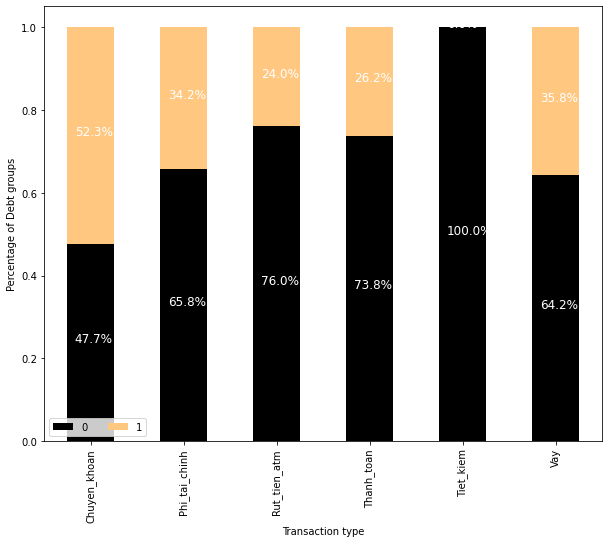

In [155]:
cross_tab_prop_status = pd.crosstab(index=df_eda['Transaction_type'],
                             columns=df_eda['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_status = pd.crosstab(index=df_eda['Transaction_type'],
                        columns=df_eda['nhomno_xhtdJuin2021'])

# create plot
cross_tab_prop_status.plot(kind='bar', 
                        stacked=True, 
                        colormap='copper', 
                        figsize=(10, 8))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Transaction type")
plt.ylabel("Percentage of Debt groups")


for n, x in enumerate([*cross_tab_status.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_status.loc[x],
                                   cross_tab_prop_status.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=12,
                 fontweight="light")

plt.show()

In [156]:
cross_tab_prop_status = pd.crosstab(index=df_eda['Status'],
                             columns=df_eda['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_prop_status

nhomno_xhtdJuin2021,0,1
Status,,
,0.003715,0.996285
Married,0.517786,0.482214
Others,0.875000,0.125000
Partner,0.227273,0.772727
Single,0.571202,0.428798


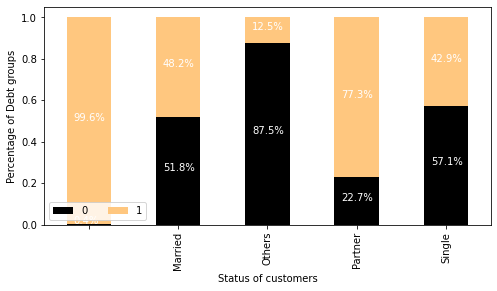

In [157]:
cross_tab_prop_status = pd.crosstab(index=df_eda['Status'],
                             columns=df_eda['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_status = pd.crosstab(index=df_eda['Status'],
                        columns=df['nhomno_xhtdJuin2021'])

# create plot
cross_tab_prop_status.plot(kind='bar', 
                        stacked=True, 
                        colormap='copper', 
                        figsize=(8, 4))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Status of customers")
plt.ylabel("Percentage of Debt groups")


for n, x in enumerate([*cross_tab_status.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_status.loc[x],
                                   cross_tab_prop_status.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=10,
                 fontweight="light")

plt.show()
# đề xuất công ty làm khảo sát tình trạng => cần 1 sự rõ ràng hơn về married & single

In [158]:
# df3 : data gốc
# df4 : data downsampling
# df_eda

cross_tab_prop_status = pd.crosstab(index=df_eda['DUM_MALE'],
                             columns=df_eda['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_prop_status

nhomno_xhtdJuin2021,0,1
DUM_MALE,,
0,0.555413,0.444587
1,0.479958,0.520042


In [159]:
cross_tab_prop_status = pd.crosstab(index=df3['DUM_MALE'],
                             columns=df3['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_prop_status

nhomno_xhtdJuin2021,0.0,1.0
DUM_MALE,,
0,0.954086,0.045914
1,0.922367,0.077633


<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='nominal_interestJuin2021'>

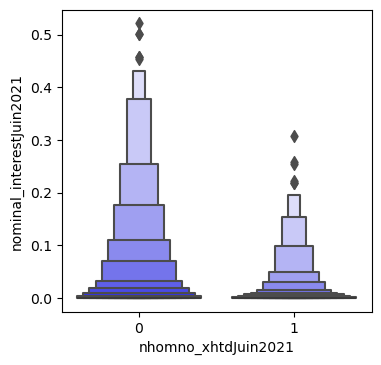

In [160]:
# Plot between nhóm nợ & lãi suất
plt.figure(figsize=(4,4), dpi=100)
sns.boxenplot(data=df_eda, 
              x="nhomno_xhtdJuin2021", 
              y="nominal_interestJuin2021", 
              color="b",scale="linear")

Text(0, 0.5, 'Nominal interest')

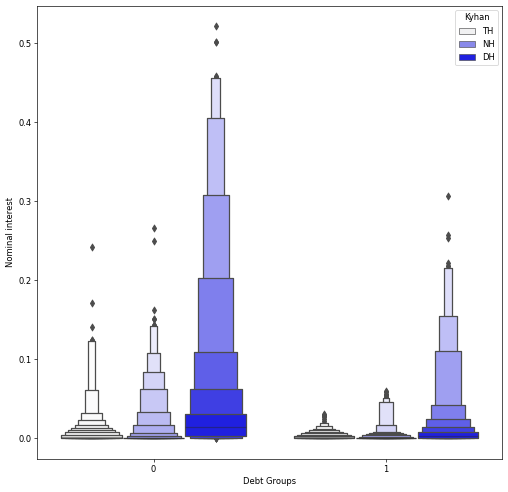

In [161]:
# Plot between nhóm nợ & lãi suất
plt.figure(figsize=(10,10), dpi=60)
sns.boxenplot(data=df_eda, 
              x="nhomno_xhtdJuin2021", 
              y="nominal_interestJuin2021", 
              hue='Kyhan',
              color="b",scale="linear")

plt.xlabel('Debt Groups')
plt.ylabel('Nominal interest')

<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='birth_incorp_age'>

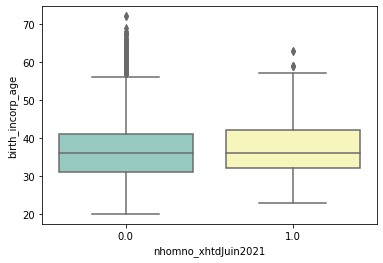

In [171]:
sns.boxplot(x="nhomno_xhtdJuin2021", y="birth_incorp_age", 
            
                 data=df3, palette="Set3")

<AxesSubplot:xlabel='nhomno_xhtdJuin2021', ylabel='nominal_interestJuin2021'>

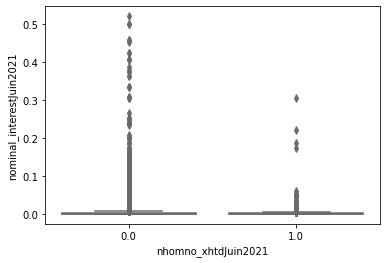

In [163]:
sns.boxplot(x="nhomno_xhtdJuin2021", y="nominal_interestJuin2021", 
            
                 data=df3, palette="Set3")

Text(33.0, 0.5, 'Period')

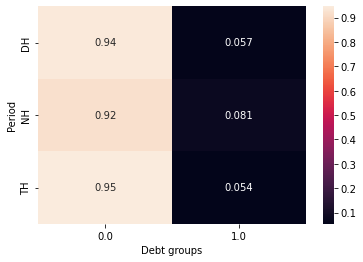

In [173]:
sns.heatmap(pd.crosstab(index=df_process['loaikyhanJuin2021'],
                             columns=df_process['nhomno_xhtdJuin2021'],
                             normalize="index"), annot=True)
plt.xlabel('Debt groups')
plt.ylabel('Period')

In [172]:
pd.crosstab(index=df_process['loaikyhanJuin2021'],
                             columns=df_process['nhomno_xhtdJuin2021'])

nhomno_xhtdJuin2021,0.0,1.0
loaikyhanJuin2021,,
DH,2472,150
NH,12661,1114
TH,8940,507


# Thanks for reading!